<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#2.----Interactive-scatterplot..." data-toc-modified-id="2.----Interactive-scatterplot...-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>2.    Interactive scatterplot...</a></span></li><li><span><a href="#Read-in-data" data-toc-modified-id="Read-in-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read-in data</a></span></li><li><span><a href="#Read-in-other-variables-of-interest" data-toc-modified-id="Read-in-other-variables-of-interest-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Read-in other variables of interest</a></span></li><li><span><a href="#Main-language" data-toc-modified-id="Main-language-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Main language</a></span><ul class="toc-item"><li><span><a href="#Exploring-gender-identity-dataset" data-toc-modified-id="Exploring-gender-identity-dataset-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Exploring gender identity dataset</a></span></li><li><span><a href="#Exploring-language-dataset" data-toc-modified-id="Exploring-language-dataset-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Exploring language dataset</a></span></li><li><span><a href="#Age-and-sex" data-toc-modified-id="Age-and-sex-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Age and sex</a></span></li></ul></li><li><span><a href="#Religion" data-toc-modified-id="Religion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Religion</a></span><ul class="toc-item"><li><span><a href="#%-Non-response-per-religious-category" data-toc-modified-id="%-Non-response-per-religious-category-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>% Non-response per religious category</a></span></li></ul></li><li><span><a href="#Outputs" data-toc-modified-id="Outputs-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Outputs</a></span><ul class="toc-item"><li><span><a href="#Ignore-beyond..." data-toc-modified-id="Ignore-beyond...-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Ignore beyond...</a></span></li></ul></li><li><span><a href="#Other-interesting-stuff..." data-toc-modified-id="Other-interesting-stuff...-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Other interesting stuff...</a></span><ul class="toc-item"><li><span><a href="#Percentage-wise" data-toc-modified-id="Percentage-wise-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Percentage-wise</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
import numpy as np

# 2.	Interactive scatterplot...

Showing the effects of other variables on non-response rates (e.g. speaking another language, non-native to UK, age, urban-rural, etc.)  

a.	Hypothesis is that there are factors that may make people feel they don’t understand the question or may worry that there is a consequence for answering incorrectly. 

b.	Hard to disprove, but a relationship between factors like language or age and non-answering rates may suggest that the questions would benefit from more elaborate discussion or additional materials.  

c.	Not sure how this might graph.


# Read-in data

Import cleaned data. Let's start with gender identity.

In [2]:
df = pd.read_csv('/Users/loucap/Documents/GitWork/InteractiveGender/Data/gi_renamed.csv')

In [3]:
df.head()

,LA_code,LA_name,GI_code,GI_categories,Observation
0,E06000001,Hartlepool,-8,Does not apply,0
1,E06000001,Hartlepool,1,Gender identity the same as sex registered at ...,70588
2,E06000001,Hartlepool,2,Gender identity different from sex registered ...,167
3,E06000001,Hartlepool,3,Trans woman,49
4,E06000001,Hartlepool,4,Trans man,51


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2317 entries, 0 to 2316
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   LA_code        2317 non-null   object
 1   LA_name        2317 non-null   object
 2   GI_code        2317 non-null   int64 
 3   GI_categories  2317 non-null   object
 4   Observation    2317 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 90.6+ KB


In [5]:
df.GI_code.unique()

array([-8,  1,  2,  3,  4,  5,  6])

In [6]:
df.GI_categories.unique()

array(['Does not apply',
       'Gender identity the same as sex registered at birth',
       'Gender identity different from sex registered at birth but no specific identity given',
       'Trans woman', 'Trans man', 'All other gender identities',
       'Not answered'], dtype=object)

In [7]:
df.LA_name.nunique()

331

In [8]:
df.head(10)

,LA_code,LA_name,GI_code,GI_categories,Observation
0,E06000001,Hartlepool,-8,Does not apply,0
1,E06000001,Hartlepool,1,Gender identity the same as sex registered at ...,70588
2,E06000001,Hartlepool,2,Gender identity different from sex registered ...,167
3,E06000001,Hartlepool,3,Trans woman,49
4,E06000001,Hartlepool,4,Trans man,51
5,E06000001,Hartlepool,5,All other gender identities,54
6,E06000001,Hartlepool,6,Not answered,3777
7,E06000002,Middlesbrough,-8,Does not apply,0
8,E06000002,Middlesbrough,1,Gender identity the same as sex registered at ...,106009
9,E06000002,Middlesbrough,2,Gender identity different from sex registered ...,496


# Read-in other variables of interest

Let's start with language - look at those speaking another language than English

In [9]:
lang = pd.read_csv('/Users/loucap/Documents/GitWork/InteractiveGender/Data/Language_2021.csv')

In [10]:
lang

,Lower Tier Local Authorities Code,Lower Tier Local Authorities,Main language (detailed) (95 categories) Code,Main language (detailed) (95 categories),Observation
0,E06000001,Hartlepool,-8,Does not apply,2918
1,E06000001,Hartlepool,1,English (English or Welsh in Wales),87544
2,E06000001,Hartlepool,2,Welsh or Cymraeg (in England only),4
3,E06000001,Hartlepool,3,Other UK language: Gaelic (Irish),0
4,E06000001,Hartlepool,4,Other UK language: Gaelic (Scottish),0
...,...,...,...,...,...
31440,W06000024,Merthyr Tydfil,90,African language: Any other African language,4
31441,W06000024,Merthyr Tydfil,91,Sign language: British Sign Language,17
31442,W06000024,Merthyr Tydfil,92,Sign language: Any other sign language,5
31443,W06000024,Merthyr Tydfil,93,Sign language: Any sign communication system,5


In [11]:
lang.rename(columns={'Lower Tier Local Authorities Code':'LA_code', 'Lower Tier Local Authorities':'LA_name', 'Main language (detailed) (95 categories) Code': 'ML_code', 'Main language (detailed) (95 categories)': 'ML_categories'}, inplace=True)

In [12]:
lang.head()

,LA_code,LA_name,ML_code,ML_categories,Observation
0,E06000001,Hartlepool,-8,Does not apply,2918
1,E06000001,Hartlepool,1,English (English or Welsh in Wales),87544
2,E06000001,Hartlepool,2,Welsh or Cymraeg (in England only),4
3,E06000001,Hartlepool,3,Other UK language: Gaelic (Irish),0
4,E06000001,Hartlepool,4,Other UK language: Gaelic (Scottish),0


# Main language

## Exploring gender identity dataset

In [13]:
### Gender identity dataset first...

# Let's calculate the GI_category percentages for each local authority

df['Percentages'] = ''


for i in df.LA_code.unique():
    b = df[df.LA_code == i]
    percent = b['Observation'] / b['Observation'].sum() * 100
    df.loc[b.index, 'Percentages'] = percent

In [14]:
# Let's calculate our non-response rate...
# Probably didn't need to do this.. but meh, will clean later!

df['Non-response_rate'] = ''

for i in df.LA_code.unique():
    b = df[df.LA_code == i]
#     print(b.index)
    percent = b['Observation'].where(b['GI_code'] == 6) / b['Observation'].sum() * 100
    df.loc[b.index, 'Non-response_rate'] = percent

In [15]:
# Let's go ahead and select only a subset of our dataframe where our GI_code == 6

not_ans = df[df['GI_code'] == 6]

In [16]:
# Incorporating region - adding it as another column
# Read-in region data

region = pd.read_csv('/Users/loucap/Documents/GitWork/InteractiveGender/Data/Local_Authority__to_Region.csv')

In [17]:
# Create a key-value dictionary using zip() and a dictionary comprehension
key_value_dict = {key: value for key, value in zip(region['LAD22NM'], region['RGN22NM'])}

# Create a new column titled 'region' and set it to empty
not_ans['region'] = ''


for key, value in key_value_dict.items():
#     Creates a boolean series where key = True
    matching_rows = not_ans['LA_name'] == key
# Use .loc to access the row in which key = True, i.e. where the 'LA_name' column matches the current key
# We then access the region column and set it's value to match the corresponding value for our key.
    not_ans.loc[matching_rows, 'region'] = value
    
    
# Manual matching for those that couldn't be filled in


not_ans.loc[not_ans['LA_name'] == 'Herefordshire', 'region'] = 'West Midlands'
not_ans.loc[not_ans['LA_name'] == 'Kingston upon Hull', 'region'] = 'Yorkshire and The Humber'
not_ans.loc[not_ans['LA_name'] == 'Bristol', 'region'] = 'South West'

# The rest of the LA_names that weren't filled in all belong to the Wales region
# So we subset the dataframe so we only have those rows where the region column is empty
b = not_ans[not_ans.region == '']

# Then we create a list from those unique values
la_names = b.LA_name.unique().tolist()

# We iterate through each value in the list
for i in la_names:
#     Again, we use the same method...
# Creates a boolean series where the rows in LA_name are set to True if they match i
    matching_rows = not_ans['LA_name'] == i
#     Use .loc to access the rows where LA_name matches i
# We then access the region column and set it's value to 'Wales'
    not_ans.loc[matching_rows, 'region'] = 'Wales'

/var/folders/dm/468m4xf52c71yhldz5ck50pw0000gn/T/ipykernel_5255/3960182255.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_ans['region'] = ''


In [18]:
# Sorted not_ans dataframe values by non-response rate, and grabbed the highest 20 values by...
# setting ascending to False and slicing the dataframe 

top20 = not_ans.sort_values(by = 'Non-response_rate', ascending = False)[:20]

# Here we have it.. this can now be plotted
top20

,LA_code,LA_name,GI_code,GI_categories,Observation,Percentages,Non-response_rate,region
1966,E09000005,Brent,6,Not answered,27684,10.061677,10.061677,London
2106,E09000025,Newham,6,Not answered,27527,9.967303,9.967303,London
1308,E07000178,Oxford,6,Not answered,13540,9.903597,9.903597,South East
2015,E09000012,Hackney,6,Not answered,20220,9.653026,9.653026,London
111,E06000016,Leicester,6,Not answered,27963,9.608849,9.608849,East Midlands
2029,E09000014,Haringey,6,Not answered,20137,9.322685,9.322685,London
419,E07000008,Cambridge,6,Not answered,11582,9.283127,9.283127,East of England
2162,E09000033,Westminster,6,Not answered,16367,9.222508,9.222508,London
209,E06000032,Luton,6,Not answered,15827,9.164553,9.164553,East of England
1105,E07000136,Boston,6,Not answered,5181,8.996822,8.996822,East Midlands


### Top 20 LAs by Non-response rate - hued by region (gender identity)

<AxesSubplot: xlabel='Non-response_rate', ylabel='LA_name'>

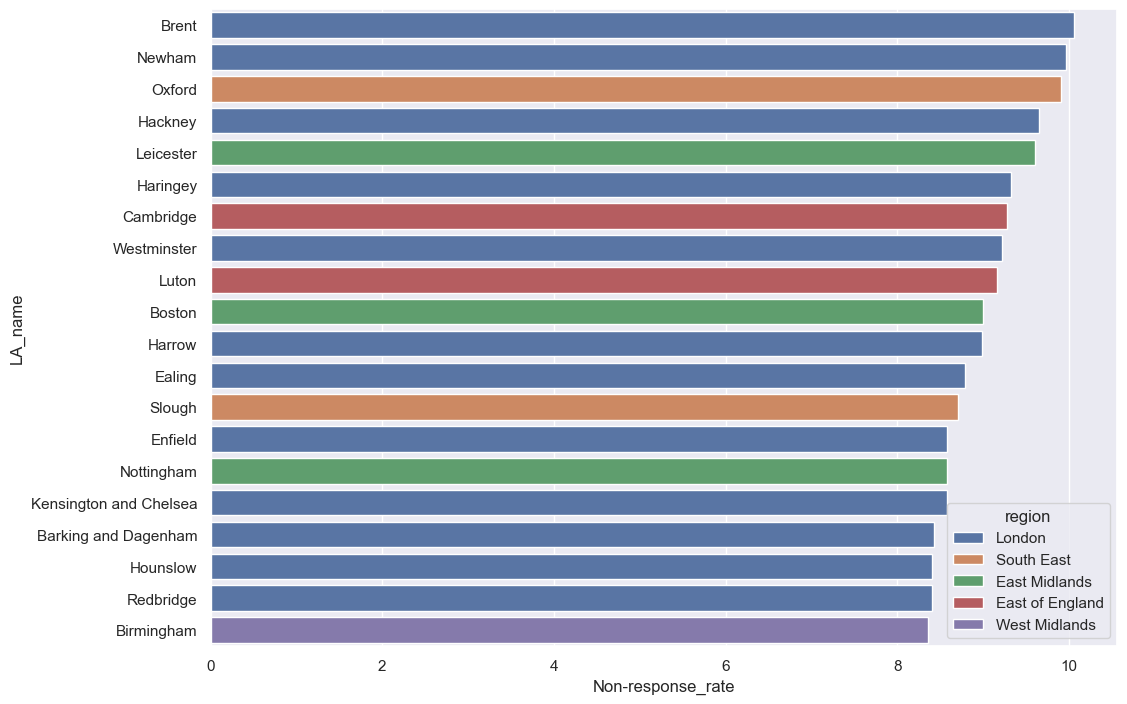

In [19]:
unique_hue_values = top20['region'].unique()
custom_palette = sns.color_palette("deep", n_colors=len(unique_hue_values))

# Create a color mapping dictionary
color_mapping = {hue_value: color for hue_value, color in zip(unique_hue_values, custom_palette)}



# Initially the graph was very small, so I set the size using figure.figsize
sns.set(rc={'figure.figsize':(11.7,8.27)})
# Simply entered my x value and y value from my top20 dataset, and set the hue to region...

sns.barplot(x = 'Non-response_rate', y = 'LA_name', data = top20, dodge = False, hue = 'region', palette = color_mapping)

## Exploring language dataset

In [20]:
lang['Percentages'] = ''


for i in lang.LA_code.unique():
    b = lang[lang.LA_code == i]
    percent = b['Observation'] / b['Observation'].sum() * 100
    lang.loc[b.index, 'Percentages'] = percent
    
lang['Non-English'] = (lang['ML_code'] != 1) & (lang['ML_code'] != -8)

In [21]:
lang2 = lang[lang['Non-English'] == True]

In [22]:
# Aggregate the data by local authority, summing the 'Observation' column
la_agg = lang2.groupby('LA_name')['Observation'].sum().reset_index()

# Merge the aggregated data with the total number of observations for each local authority
la_totals = lang.groupby('LA_name')['Observation'].sum().reset_index()
la_agg = la_agg.merge(la_totals, on='LA_name', suffixes=('', '_total'))

In [23]:
la_agg 

,LA_name,Observation,Observation_total
0,Adur,1971,64542
1,Allerdale,1073,96154
2,Amber Valley,1850,126207
3,Arun,9469,164889
4,Ashfield,3944,126308
...,...,...,...
326,Wrexham,6682,135116
327,Wychavon,6065,132486
328,Wyre,1376,111944
329,Wyre Forest,2331,101608


In [24]:
# Calculate the percentage of Non-English speakers for each local authority
la_agg['Percentage'] = (la_agg['Observation'] / la_agg['Observation_total']) * 100

In [25]:
# Create a key-value dictionary using zip() and a dictionary comprehension
key_value_dict = {key: value for key, value in zip(region['LAD22NM'], region['RGN22NM'])}

la_agg['region'] = ''


for key, value in key_value_dict.items():
    matching_rows = la_agg['LA_name'] == key
#     print(matching_rows)
    la_agg.loc[matching_rows, 'region'] = value
    
    
# Manual matching for those that couldn't be filled in

# df.loc[df['LA_name'] == [['Kingston upon Hull', 'Herefordshire'], 'region']] = ['Yorkshire and The Humber', 'West Midlands']
la_agg.loc[la_agg['LA_name'] == 'Herefordshire', 'region'] = 'West Midlands'
la_agg.loc[la_agg['LA_name'] == 'Kingston upon Hull', 'region'] = 'Yorkshire and The Humber'
la_agg.loc[la_agg['LA_name'] == 'Bristol', 'region'] = 'South West'

b = la_agg[la_agg.region == '']
la_names = b.LA_name.unique().tolist()

for i in la_names:
    matching_rows = la_agg['LA_name'] == i
#     print(matching_rows)
    la_agg.loc[matching_rows, 'region'] = 'Wales'


In [26]:
# Sort the local authorities based on the percentage of Non-English speakers, in descending order
la_agg_sorted = la_agg.sort_values(by='Percentage', ascending=False)

In [27]:
top20_lang = la_agg_sorted[:30]

In [28]:
top20_lang

,LA_name,Observation,Observation_total,Percentage,region
184,Newham,116570,351029,33.208083,London
30,Brent,110404,339820,32.488965,London
85,Ealing,109501,367117,29.827276,London
126,Harrow,77406,261208,29.633855,London
155,Leicester,106800,368570,28.976856,East Midlands
138,Hounslow,78555,288181,27.258910,London
123,Haringey,69460,264238,26.286908,London
241,Slough,41438,158492,26.145168,South East
292,Tower Hamlets,80621,310304,25.981296,London
315,Westminster,52599,204223,25.755669,London


### Top 20 LAs by % of Non-English as main language

<AxesSubplot: xlabel='Percentage', ylabel='LA_name'>

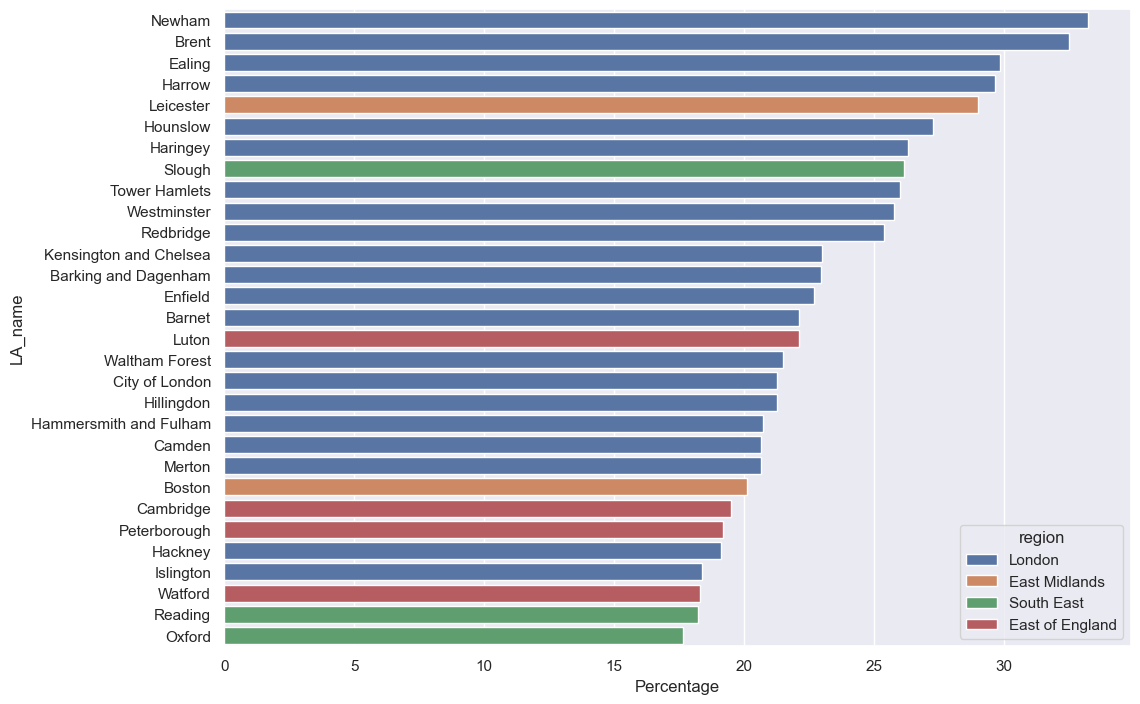

In [29]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x = 'Percentage', y = 'LA_name', hue = "region", data = top20_lang, dodge = False)
# plt.xticks(rotation=55)

In [30]:
merged_df2_ = not_ans.merge(la_agg, on = ['LA_name'])


### Visualisation

#### Gender identity

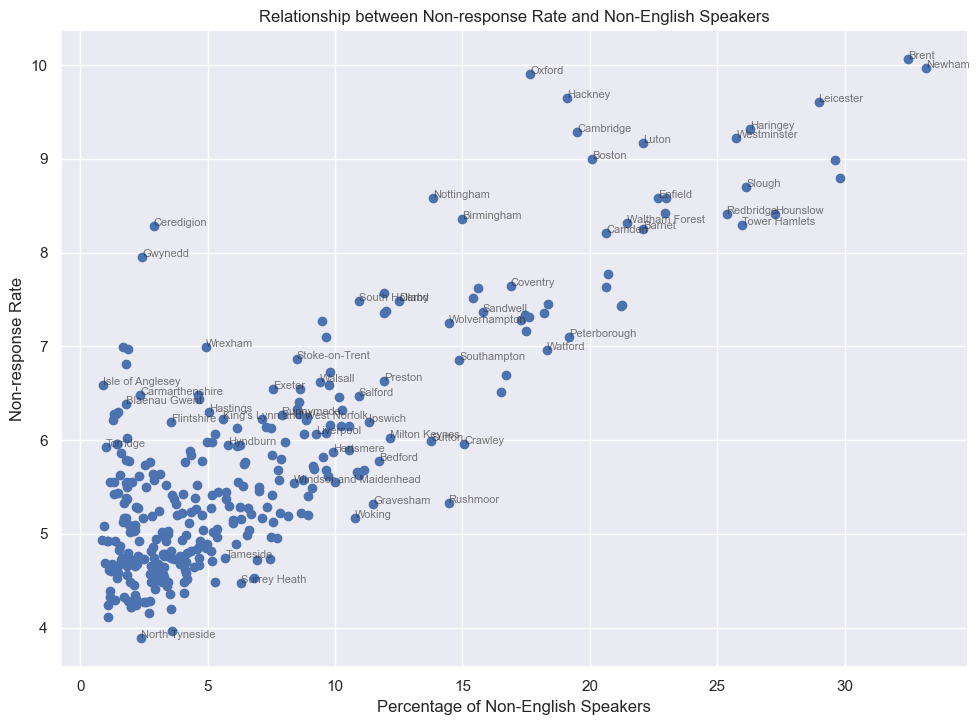

In [31]:
# Create a scatterplot to visualize the relationship between non-response rates and the percentage of non-English speakers
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import numpy as np

plt.scatter(merged_df2_['Percentage'], merged_df2_['Non-response_rate'])


# Find nearest neighbors
X = merged_df2_[['Percentage', 'Non-response_rate']].values
nbrs = NearestNeighbors(n_neighbors=2).fit(X)
distances, indices = nbrs.kneighbors(X)
min_distance = 0.3

for i, row in merged_df2_.iterrows():
    if distances[i][1] >= min_distance:
        plt.annotate(row['LA_name'], (row['Percentage'], row['Non-response_rate']), fontsize=8, alpha=0.6)

plt.xlabel('Percentage of Non-English Speakers')
plt.ylabel('Non-response Rate')
plt.title('Relationship between Non-response Rate and Non-English Speakers')
plt.show()

In [32]:
merged_df2_

,LA_code,LA_name,GI_code,GI_categories,Observation_x,Percentages,Non-response_rate,region_x,Observation_y,Observation_total,Percentage,region_y
0,E06000001,Hartlepool,6,Not answered,3777,5.057173,5.057173,North East,1875,92337,2.030605,North East
1,E06000002,Middlesbrough,6,Not answered,6991,6.135793,6.135793,North East,10510,143923,7.302516,North East
2,E06000003,Redcar and Cleveland,6,Not answered,5533,4.925139,4.925139,North East,1460,136533,1.069339,North East
3,E06000004,Stockton-on-Tees,6,Not answered,7381,4.671223,4.671223,North East,5674,196603,2.886019,North East
4,E06000005,Darlington,6,Not answered,3951,4.484371,4.484371,North East,4403,107800,4.084416,North East
...,...,...,...,...,...,...,...,...,...,...,...,...
326,W06000020,Torfaen,6,Not answered,4474,5.956359,5.956359,Wales,1318,92273,1.428370,Wales
327,W06000021,Monmouthshire,6,Not answered,4400,5.623938,5.623938,Wales,1457,92955,1.567425,Wales
328,W06000022,Newport,6,Not answered,7584,5.95183,5.95183,Wales,10035,159590,6.287988,Wales
329,W06000023,Powys,6,Not answered,7847,6.97288,6.97288,Wales,2496,133173,1.874254,Wales


In [33]:
regions = merged_df2_.region_x.unique()

regions

array(['North East', 'North West', 'Yorkshire and The Humber',
       'East Midlands', 'West Midlands', 'South West', 'East of England',
       'South East', 'London', 'Wales'], dtype=object)

In [34]:
# unique_hue_values = list(set(top20['region'].unique()) | set(top20_2['region'].unique()))
custom_palette = sns.color_palette("hls", n_colors=len(merged_df2_.region_x.unique()))

# # Create a color mapping dictionary
# color_mapping = {hue_value: color for hue_value, color in zip(unique_hue_values, custom_palette)}

region_colour_map = dict(zip(regions, custom_palette))
points = merged_df2_.region_x.map(region_colour_map)

In [35]:
region_colour_map

{'North East': (0.86, 0.3712, 0.33999999999999997),
 'North West': (0.86, 0.6832, 0.33999999999999997),
 'Yorkshire and The Humber': (0.7247999999999999, 0.86, 0.33999999999999997),
 'East Midlands': (0.41279999999999994, 0.86, 0.33999999999999997),
 'West Midlands': (0.33999999999999997, 0.86, 0.5792000000000002),
 'South West': (0.33999999999999997, 0.8287999999999999, 0.86),
 'East of England': (0.33999999999999997, 0.5167999999999995, 0.86),
 'South East': (0.4752000000000003, 0.33999999999999997, 0.86),
 'London': (0.7871999999999999, 0.33999999999999997, 0.86),
 'Wales': (0.86, 0.33999999999999997, 0.6207999999999999)}

In [36]:
custom_palette

[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.6832, 0.33999999999999997),
 (0.7247999999999999, 0.86, 0.33999999999999997),
 (0.41279999999999994, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.5792000000000002),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.33999999999999997, 0.5167999999999995, 0.86),
 (0.4752000000000003, 0.33999999999999997, 0.86),
 (0.7871999999999999, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.6207999999999999)]

In [37]:
# # Create a dictionary to map each unique region to a unique color
# regions = merged_df2['region_x'].unique()
# colours = plt.cm.rainbow(np.linspace(0,1, len(regions)))
# region_colour = dict(zip(regions, colours))

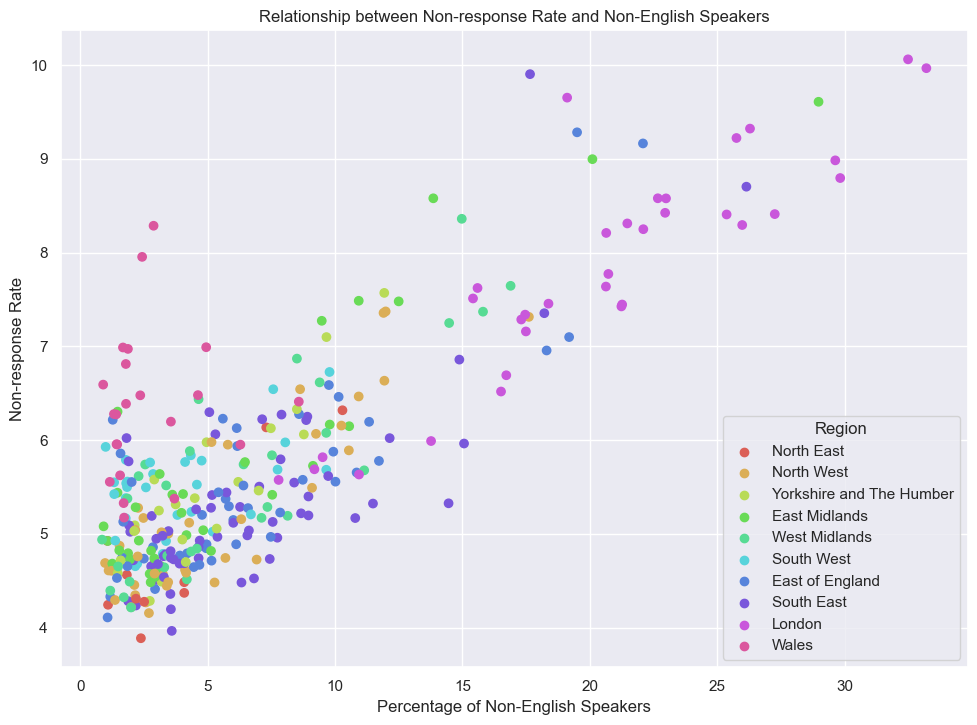

In [38]:
# Create a scatterplot to visualize the relationship between non-response rates and the percentage of non-English speakers
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import numpy as np

plt.scatter(merged_df2_['Percentage'], merged_df2_['Non-response_rate'], c = points)


# Find nearest neighbors
X = merged_df2_[['Percentage', 'Non-response_rate']].values
nbrs = NearestNeighbors(n_neighbors=2).fit(X)
distances, indices = nbrs.kneighbors(X)
min_distance = 0.3

# for i, row in merged_df2.iterrows():
#     if distances[i][1] >= min_distance:
#         plt.annotate(row['LA_name'], (row['Percentage'], row['Non-response_rate']), fontsize=8, alpha=0.6)

        
        
for region, colour in region_colour_map.items():
    plt.scatter([],[], c = [colour], label= region)

plt.legend(title="Region", loc="best")
plt.xlabel('Percentage of Non-English Speakers')
plt.ylabel('Non-response Rate')
plt.title('Relationship between Non-response Rate and Non-English Speakers')
plt.show()



### URBAN VS RURAL

In [39]:
# Read-in data from urban vs rural

rural = pd.read_excel('/Users/loucap/Documents/GitWork/InteractiveGender/Data/Rural_Urban_2011.xlsx')
rural.head()

,LAD11CD,LAD18CD,LAD18NM,Total Rural population 2011,Urban City and Town population 2011,Urban Minor Conurbation population 2011,Urban Major Conurbation population 2011,Total Urban population 2011,Total population 2011,Hub towns (rural related) population included in Urban population 2011,Rural including hub towns (rural & rural related) population 2011,Rural including hub towns (rural & rural related) population as % of Total population 2011,RUC11CD,RUC11,Broad RUC11
0,E06000001,E06000001,Hartlepool,3173,88855,0,0,88855,92028,0,3173,3.44,4,Urban with City and Town,Predominantly Urban
1,E06000002,E06000002,Middlesbrough,957,137455,0,0,137455,138412,0,957,0.69,4,Urban with City and Town,Predominantly Urban
2,E06000003,E06000003,Redcar and Cleveland,43880,91297,0,0,91297,135177,0,43880,32.46,3,Urban with Significant Rural (rural including ...,Urban with Significant Rural
3,E06000004,E06000004,Stockton-on-Tees,7536,184074,0,0,184074,191610,0,7536,3.93,4,Urban with City and Town,Predominantly Urban
4,E06000005,E06000005,Darlington,13201,92363,0,0,92363,105564,0,13201,12.50,4,Urban with City and Town,Predominantly Urban


In [40]:
rural = rural[['LAD18NM', 'Broad RUC11']]
rural = rural.rename(columns = {"LAD18NM": "LA_name", "Broad RUC11": "Urb_Rur"})


In [41]:
rural.head()

,LA_name,Urb_Rur
0,Hartlepool,Predominantly Urban
1,Middlesbrough,Predominantly Urban
2,Redcar and Cleveland,Urban with Significant Rural
3,Stockton-on-Tees,Predominantly Urban
4,Darlington,Predominantly Urban


In [42]:
rural.LA_name.nunique()

326

In [43]:
merged_df2_.LA_name.nunique()

331

In [44]:
merged_df2_[merged_df2_.region_x == 'Wales']

,LA_code,LA_name,GI_code,GI_categories,Observation_x,Percentages,Non-response_rate,region_x,Observation_y,Observation_total,Percentage,region_y
309,W06000001,Isle of Anglesey,6,Not answered,3767,6.591772,6.591772,Wales,622,68876,0.903072,Wales
310,W06000002,Gwynedd,6,Not answered,7793,7.954557,7.954557,Wales,2855,117387,2.432126,Wales
311,W06000003,Conwy,6,Not answered,6564,6.811814,6.811814,Wales,2057,114750,1.792593,Wales
312,W06000004,Denbighshire,6,Not answered,5514,6.988062,6.988062,Wales,1610,95816,1.680304,Wales
313,W06000005,Flintshire,6,Not answered,7906,6.196993,6.196993,Wales,5518,154955,3.561034,Wales
314,W06000006,Wrexham,6,Not answered,7709,6.990768,6.990768,Wales,6682,135116,4.945380,Wales
315,W06000008,Ceredigion,6,Not answered,5087,8.286501,8.286501,Wales,2059,71471,2.880889,Wales
316,W06000009,Pembrokeshire,6,Not answered,6438,6.277974,6.277974,Wales,1636,123359,1.326210,Wales
317,W06000010,Carmarthenshire,6,Not answered,10072,6.477754,6.477754,Wales,4432,187897,2.358739,Wales
318,W06000011,Swansea,6,Not answered,12821,6.4799,6.4799,Wales,11023,238494,4.621919,Wales


In [45]:
rural_df = merged_df2_.merge(rural, on = ['LA_name'])

In [46]:
rural_df.head()

,LA_code,LA_name,GI_code,GI_categories,Observation_x,Percentages,Non-response_rate,region_x,Observation_y,Observation_total,Percentage,region_y,Urb_Rur
0,E06000001,Hartlepool,6,Not answered,3777,5.057173,5.057173,North East,1875,92337,2.030605,North East,Predominantly Urban
1,E06000002,Middlesbrough,6,Not answered,6991,6.135793,6.135793,North East,10510,143923,7.302516,North East,Predominantly Urban
2,E06000003,Redcar and Cleveland,6,Not answered,5533,4.925139,4.925139,North East,1460,136533,1.069339,North East,Urban with Significant Rural
3,E06000004,Stockton-on-Tees,6,Not answered,7381,4.671223,4.671223,North East,5674,196603,2.886019,North East,Predominantly Urban
4,E06000005,Darlington,6,Not answered,3951,4.484371,4.484371,North East,4403,107800,4.084416,North East,Predominantly Urban


In [47]:
merged_df2_[merged_df2_.LA_name == 'Ceredigion']

,LA_code,LA_name,GI_code,GI_categories,Observation_x,Percentages,Non-response_rate,region_x,Observation_y,Observation_total,Percentage,region_y
315,W06000008,Ceredigion,6,Not answered,5087,8.286501,8.286501,Wales,2059,71471,2.880889,Wales


In [48]:
from bokeh.palettes import Category10

In [49]:
from bokeh.models.annotations import LabelSet
from bokeh.models import ColumnDataSource, Label, LabelSet
from bokeh.palettes import Category10
from bokeh.io import show
from bokeh.models import CheckboxGroup, CustomJS
from bokeh.layouts import column
from bokeh.models import Button
from bokeh.plotting import figure, curdoc

LABELS = ["Labels"]
checkbox_group = CheckboxGroup(labels=LABELS, active=[0, 1])
# urban = rural_df.Urb_Rur.unique()


source=ColumnDataSource(merged_df2_)

tool = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("name","@LA_name"),
]

p1 = figure(title="Relationship between Non-response Rate and Non-English Speakers", x_axis_label="Percentage of Non-English Speakers", y_axis_label= "Non-response Rate", tooltips = tool)
output_notebook()

for region, color in zip(merged_df2_.region_x.unique(), Category10[10]):
    b = merged_df2_[merged_df2_.region_x == region]
    p1.circle(x = 'Percentage', y = 'Non-response_rate', size = 10, alpha = 0.5, color = color, legend_label = region, muted_color = color, muted_alpha = 0.1, source = b)

labels = LabelSet(x='Percentage', y='Non-response_rate', text='LA_name',x_offset=5, y_offset=5, text_font_size = "5pt",source=ColumnDataSource(merged_df2_))
tool = [
    ("Name","$LA_name"),
]

# p1.add_layout(labels)
p1.legend.location = "bottom_right"
p1.legend.click_policy="hide"
p1.legend.title = "Regions"

def callback():
    p1.add_layout(labels)


    
# add a button widget and configure with the call back
button = Button(label="Labels")
button.on_event('button_click', callback)
show(p1)

curdoc().add_root(column(button, p1))

Loading BokehJS ...

In [50]:
labels.x_offset

5

In [51]:
merged_df2_.head()

,LA_code,LA_name,GI_code,GI_categories,Observation_x,Percentages,Non-response_rate,region_x,Observation_y,Observation_total,Percentage,region_y
0,E06000001,Hartlepool,6,Not answered,3777,5.057173,5.057173,North East,1875,92337,2.030605,North East
1,E06000002,Middlesbrough,6,Not answered,6991,6.135793,6.135793,North East,10510,143923,7.302516,North East
2,E06000003,Redcar and Cleveland,6,Not answered,5533,4.925139,4.925139,North East,1460,136533,1.069339,North East
3,E06000004,Stockton-on-Tees,6,Not answered,7381,4.671223,4.671223,North East,5674,196603,2.886019,North East
4,E06000005,Darlington,6,Not answered,3951,4.484371,4.484371,North East,4403,107800,4.084416,North East


In [52]:
# pd.set_option("max_rows", None)

merged_df2_[merged_df2_.region_x == "Wales"]

,LA_code,LA_name,GI_code,GI_categories,Observation_x,Percentages,Non-response_rate,region_x,Observation_y,Observation_total,Percentage,region_y
309,W06000001,Isle of Anglesey,6,Not answered,3767,6.591772,6.591772,Wales,622,68876,0.903072,Wales
310,W06000002,Gwynedd,6,Not answered,7793,7.954557,7.954557,Wales,2855,117387,2.432126,Wales
311,W06000003,Conwy,6,Not answered,6564,6.811814,6.811814,Wales,2057,114750,1.792593,Wales
312,W06000004,Denbighshire,6,Not answered,5514,6.988062,6.988062,Wales,1610,95816,1.680304,Wales
313,W06000005,Flintshire,6,Not answered,7906,6.196993,6.196993,Wales,5518,154955,3.561034,Wales
314,W06000006,Wrexham,6,Not answered,7709,6.990768,6.990768,Wales,6682,135116,4.945380,Wales
315,W06000008,Ceredigion,6,Not answered,5087,8.286501,8.286501,Wales,2059,71471,2.880889,Wales
316,W06000009,Pembrokeshire,6,Not answered,6438,6.277974,6.277974,Wales,1636,123359,1.326210,Wales
317,W06000010,Carmarthenshire,6,Not answered,10072,6.477754,6.477754,Wales,4432,187897,2.358739,Wales
318,W06000011,Swansea,6,Not answered,12821,6.4799,6.4799,Wales,11023,238494,4.621919,Wales


In [53]:
urban = rural_df.Urb_Rur.unique()
urban

array(['Predominantly Urban', 'Urban with Significant Rural',
       'Predominantly Rural'], dtype=object)

In [54]:
count = 0
l = []
missing = []

for i in merged_df2_.LA_name.unique():
    for x in rural.LA_name.unique():
        if i == x:
            l.append(i)
            count += 1
    
    if i not in rural.LA_name.unique():
        missing.append(i)
            
count
missing

['Bournemouth, Christchurch and Poole',
 'Dorset',
 'Buckinghamshire',
 'North Northamptonshire',
 'West Northamptonshire',
 'East Suffolk',
 'West Suffolk',
 'Somerset West and Taunton',
 'Isle of Anglesey',
 'Gwynedd',
 'Conwy',
 'Denbighshire',
 'Flintshire',
 'Wrexham',
 'Ceredigion',
 'Pembrokeshire',
 'Carmarthenshire',
 'Swansea',
 'Neath Port Talbot',
 'Bridgend',
 'Vale of Glamorgan',
 'Cardiff',
 'Rhondda Cynon Taf',
 'Caerphilly',
 'Blaenau Gwent',
 'Torfaen',
 'Monmouthshire',
 'Newport',
 'Powys',
 'Merthyr Tydfil']

In [55]:
from bokeh.transform import factor_cmap, factor_mark
from bokeh.plotting import figure, show
from bokeh.palettes import Category10

tool = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("name","@LA_name"),
]
# p1.legend.location = "bottom_right"
# p1.legend.click_policy="hide"
# p1.legend.title = "Regions"

regions = rural_df.region_x.unique()
urban = rural_df.Urb_Rur.unique()
markers = ["circle_cross", "circle", "triangle"]

p2 = figure(title="Relationship between Non-response Rate and Non-English Speakers", x_axis_label="Non-response Rate", y_axis_label="Percentage of Non-English Speakers", tooltips = tool)
output_notebook()

p2.scatter("Percentage", "Non-response_rate", source = rural_df, fill_alpha = 0.5, size = 10, marker = factor_mark('Urb_Rur', markers, urban), color = factor_cmap('region_x', Category10[10], regions), legend_field = 'region_x')

show(p2)

Loading BokehJS ...

In [56]:
from bokeh.transform import factor_cmap, factor_mark
from bokeh.plotting import figure, show
from bokeh.palettes import Category10

tool = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("name","@LA_name"),
]
# p1.legend.location = "bottom_right"
# p1.legend.click_policy="hide"
# p1.legend.title = "Regions"

regions = rural_df.region_x.unique()
urban = rural_df.Urb_Rur.unique()


p2 = figure(title="Relationship between Non-response Rate and Non-English Speakers", x_axis_label="Non-response Rate", y_axis_label="Percentage of Non-English Speakers", tooltips = tool)
output_notebook()

p2.scatter("Percentage", "Non-response_rate", source = rural_df, fill_alpha = 0.5, size = 10, color = factor_cmap('Urb_Rur', Category10[10], urban), legend_field = 'Urb_Rur')

show(p2)

Loading BokehJS ...

In [57]:
urban

array(['Predominantly Urban', 'Urban with Significant Rural',
       'Predominantly Rural'], dtype=object)

In [58]:
merged_df2_.region_x.value_counts()

South East                  64
East of England             45
North West                  39
East Midlands               35
London                      33
West Midlands               30
South West                  30
Wales                       22
Yorkshire and The Humber    21
North East                  12
Name: region_x, dtype: int64

In [59]:
from bokeh.models.annotations import LabelSet
from bokeh.models import ColumnDataSource, Label, LabelSet
from bokeh.palettes import Category10
from bokeh.io import show
from bokeh.models import CheckboxGroup, CustomJS
from bokeh.layouts import column
from bokeh.models import Button
from bokeh.plotting import figure, curdoc

LABELS = ["Labels"]
checkbox_group = CheckboxGroup(labels=LABELS, active=[0, 1])
urban = rural_df.Urb_Rur.unique()


source=ColumnDataSource(rural_df)

tool = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("name","@LA_name"),
]

p1 = figure(title="Relationship between Non-response Rate and Non-English Speakers", x_axis_label="Non-response Rate", y_axis_label="Percentage of Non-English Speakers", tooltips = tool)
output_notebook()

for region, color in zip(rural_df.region_x.unique(), Category10[10]):
    b = rural_df[rural_df.region_x == region]
    p1.circle(x = 'Percentage', y = 'Non-response_rate', size = 10, alpha = 0.5, color = color, legend_label = region, muted_color = color, muted_alpha = 0.1, source = b)

labels = LabelSet(x='Percentage', y='Non-response_rate', text='LA_name',x_offset=5, y_offset=5, text_font_size = "5pt",source=ColumnDataSource(rural_df))
tool = [
    ("Name","$LA_name"),
]

# p1.add_layout(labels)
p1.legend.location = "bottom_right"
p1.legend.click_policy="hide"
p1.legend.title = "Regions"

def callback():
    p1.add_layout(labels)

    
# add a button widget and configure with the call back
button = Button(label="Labels")
button.on_event('button_click', callback)
show(p1)

curdoc().add_root(column(button, p1))

Loading BokehJS ...

In [60]:
urban

array(['Predominantly Urban', 'Urban with Significant Rural',
       'Predominantly Rural'], dtype=object)

In [61]:
# unique_hue_values = list(set(top20['region'].unique()) | set(top20_2['region'].unique()))
custom_palette = sns.color_palette("hls", n_colors=len(merged_df2_.region_x.unique()))

# # Create a color mapping dictionary
# color_mapping = {hue_value: color for hue_value, color in zip(unique_hue_values, custom_palette)}

region_colour_map = dict(zip(regions, custom_palette))
points = merged_df2_.region_x.map(region_colour_map)

In [62]:
region_colour_map.values()

dict_values([(0.86, 0.3712, 0.33999999999999997), (0.86, 0.6832, 0.33999999999999997), (0.7247999999999999, 0.86, 0.33999999999999997), (0.41279999999999994, 0.86, 0.33999999999999997), (0.33999999999999997, 0.86, 0.5792000000000002), (0.33999999999999997, 0.8287999999999999, 0.86), (0.33999999999999997, 0.5167999999999995, 0.86), (0.4752000000000003, 0.33999999999999997, 0.86), (0.7871999999999999, 0.33999999999999997, 0.86)])

In [63]:
# Convert the columns to numeric types if needed
merged_df2_['Non-response_rate'] = pd.to_numeric(merged_df2_['Non-response_rate'], errors='coerce')
merged_df2_['Percentage'] = pd.to_numeric(merged_df2_['Percentage'], errors='coerce')


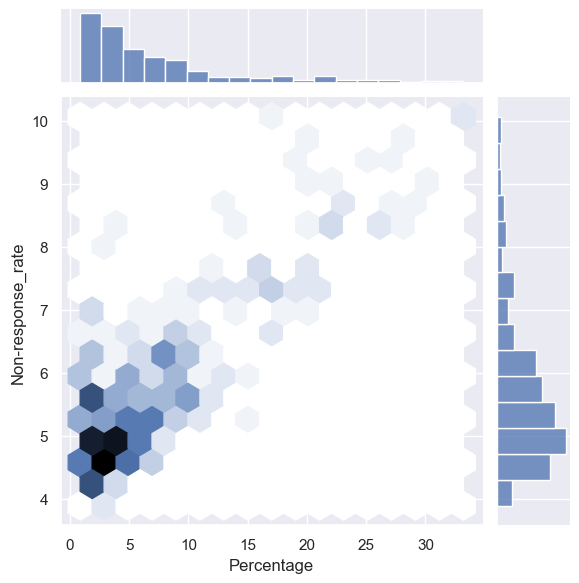

In [64]:
import seaborn as sns

# Create a hexbin plot
sns.jointplot(x='Percentage', y='Non-response_rate', data=merged_df2_, kind='hex')

In [65]:
corr_coeff = merged_df2_['Non-response_rate'].corr(merged_df2_['Percentage'])
print("Correlation Coefficient:", corr_coeff)

# Strong positive linear relationship between our 2 variables.

Correlation Coefficient: 0.8266035274657156


In [66]:
import statsmodels.api as sm

X = merged_df2_['Percentage']
y = merged_df2_['Non-response_rate']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Non-response_rate   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     709.8
Date:                Wed, 03 May 2023   Prob (F-statistic):           3.87e-84
Time:                        16:56:08   Log-Likelihood:                -352.58
No. Observations:                 331   AIC:                             709.2
Df Residuals:                     329   BIC:                             716.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6114      0.057     80.892      0.0

In [67]:
merged_df2_.sort_values(by = 'Percentage', ascending = False)

,LA_code,LA_name,GI_code,GI_categories,Observation_x,Percentages,Non-response_rate,region_x,Observation_y,Observation_total,Percentage,region_y
300,E09000025,Newham,6,Not answered,27527,9.967303,9.967303,London,116570,351029,33.208083,London
280,E09000005,Brent,6,Not answered,27684,10.061677,10.061677,London,110404,339820,32.488965,London
284,E09000009,Ealing,6,Not answered,25979,8.795439,8.795439,London,109501,367117,29.827276,London
290,E09000015,Harrow,6,Not answered,18832,8.983961,8.983961,London,77406,261208,29.633855,London
15,E06000016,Leicester,6,Not answered,27963,9.608849,9.608849,East Midlands,106800,368570,28.976856,East Midlands
...,...,...,...,...,...,...,...,...,...,...,...,...
84,E07000046,Torridge,6,Not answered,3412,5.927728,5.927728,South West,681,68118,0.999736,South West
67,E07000029,Copeland,6,Not answered,2626,4.6887,4.688700,North West,656,67073,0.978039,North West
73,E07000035,Derbyshire Dales,6,Not answered,3102,5.080166,5.080166,East Midlands,658,71542,0.919739,East Midlands
309,W06000001,Isle of Anglesey,6,Not answered,3767,6.591772,6.591772,Wales,622,68876,0.903072,Wales


In [68]:
a = lang[lang['Non-English'] == True]
a.sort_values(by = 'Observation', ascending = False)

,LA_code,LA_name,ML_code,ML_categories,Observation,Percentages,Non-English
1479,E06000016,Leicester,54,South Asian language: Gujarati,44887,12.178691,True
29028,E09000030,Tower Hamlets,53,South Asian language: Bengali (with Sylheti an...,32772,10.561256,True
25034,E08000025,Birmingham,49,South Asian language: Urdu,25131,2.195006,True
26654,E09000005,Brent,54,South Asian language: Gujarati,21513,6.330704,True
28553,E09000025,Newham,53,South Asian language: Bengali (with Sylheti an...,21407,6.098357,True
...,...,...,...,...,...,...,...
8632,E07000065,Wealden,82,African language: Igbo,0,0.0,True
16285,E07000163,Craven,40,Other European language (non-national): Yiddish,0,0.0,True
8634,E07000065,Wealden,84,African language: Luganda,0,0.0,True
8635,E07000065,Wealden,85,African language: Lingala,0,0.0,True


In [69]:
perc = []
names = []

for i in a.ML_categories.unique():
    b = a[a['ML_categories'] == i]
    names.append(i)
    summed = b.Observation.sum()
    perc.append(summed)
    
#     b = df[df.LA_code == i]
#     percent = b['Observation'] / b['Observation'].sum() * 100
#     df.loc[b.index, 'Percentages'] = percent

In [70]:
result = pd.DataFrame(list(zip(names, perc)), columns=['Category', 'Observations'])

In [71]:
result['Percentages'] = result['Observations'] / 59597557 * 100

In [72]:
result.sort_values(by = 'Percentages', ascending = False)

,Category,Observations,Percentages
15,Other European language (EU): Polish,611831,1.026604
18,Other European language (EU): Romanian,471952,0.791898
49,South Asian language: Panjabi,290745,0.487847
47,South Asian language: Urdu,269863,0.452809
11,Portuguese,224720,0.377062
...,...,...,...
72,Caribbean Creole: English-based Caribbean Creole,143,0.000240
71,North or South American language,71,0.000119
9,Other UK language: Irish Traveller Cant,36,0.000060
7,Other UK language: Ulster Scots,13,0.000022


## Age and sex

In [73]:
# !pip install pyjanitor==0.23.1
# !pip install seaborn

In [74]:
age_sex = pd.read_excel('/Users/loucap/Documents/GitWork/InteractiveGender/Data/Age_sex_GI.xlsx')

In [75]:
age_sex.head()

,England and Wales code,England and Wales label,Gender identity (8 categories) code,Gender identity (8 categories) label,Sex code,Sex label,Age code,Age label,Observation
0,K04000001,England and Wales,1,Gender identity the same as sex registered at ...,1,Female,1,Aged 16 to 24 years,2874920
1,K04000001,England and Wales,2,Gender identity different from sex registered ...,1,Female,1,Aged 16 to 24 years,7220
2,K04000001,England and Wales,3,Trans woman,1,Female,1,Aged 16 to 24 years,3380
3,K04000001,England and Wales,4,Trans man,1,Female,1,Aged 16 to 24 years,8755
4,K04000001,England and Wales,6,All other gender identities,1,Female,1,Aged 16 to 24 years,4590


In [76]:
# Let's get rid of the first 2 columns

age_sex = age_sex.drop(age_sex.columns[[0,1]], axis = 1)

# Can also drop by their name..

# age_sex = age_sex.drop(['England and Wales code', 'England and Wales label'], axis = 1)

In [77]:
age_sex.head()

,Gender identity (8 categories) code,Gender identity (8 categories) label,Sex code,Sex label,Age code,Age label,Observation
0,1,Gender identity the same as sex registered at ...,1,Female,1,Aged 16 to 24 years,2874920
1,2,Gender identity different from sex registered ...,1,Female,1,Aged 16 to 24 years,7220
2,3,Trans woman,1,Female,1,Aged 16 to 24 years,3380
3,4,Trans man,1,Female,1,Aged 16 to 24 years,8755
4,6,All other gender identities,1,Female,1,Aged 16 to 24 years,4590


In [78]:
# Before we split the dataset into 2 so that it's easier to work with...
# Let's clean our column names

from janitor import *

# Clean column names

age_sex = age_sex.clean_names()

In [79]:
age_sex.columns

Index(['gender_identity_8_categories_code',
       'gender_identity_8_categories_label', 'sex_code', 'sex_label',
       'age_code', 'age_label', 'observation'],
      dtype='object')

In [80]:
female = age_sex[age_sex.sex_label == 'Female']
male = age_sex[age_sex.sex_label == 'Male']

In [81]:
# Our observation column contains some string values, so let's convert it to numeric

female['observation'] = pd.to_numeric(female['observation'], errors='coerce')

# Let's calculate the percentage of each observation value within each age group
# We'll store the results in a new column titled 'group_pct'

female['group_pct'] = female.groupby('age_label')['observation'].apply(lambda x: x / x.sum() * 100).round(2)

/var/folders/dm/468m4xf52c71yhldz5ck50pw0000gn/T/ipykernel_5255/3627212363.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female['observation'] = pd.to_numeric(female['observation'], errors='coerce')
/var/folders/dm/468m4xf52c71yhldz5ck50pw0000gn/T/ipykernel_5255/3627212363.py:8: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  female['group_pct'] = female.groupby('age_label')['observation'].apply(l

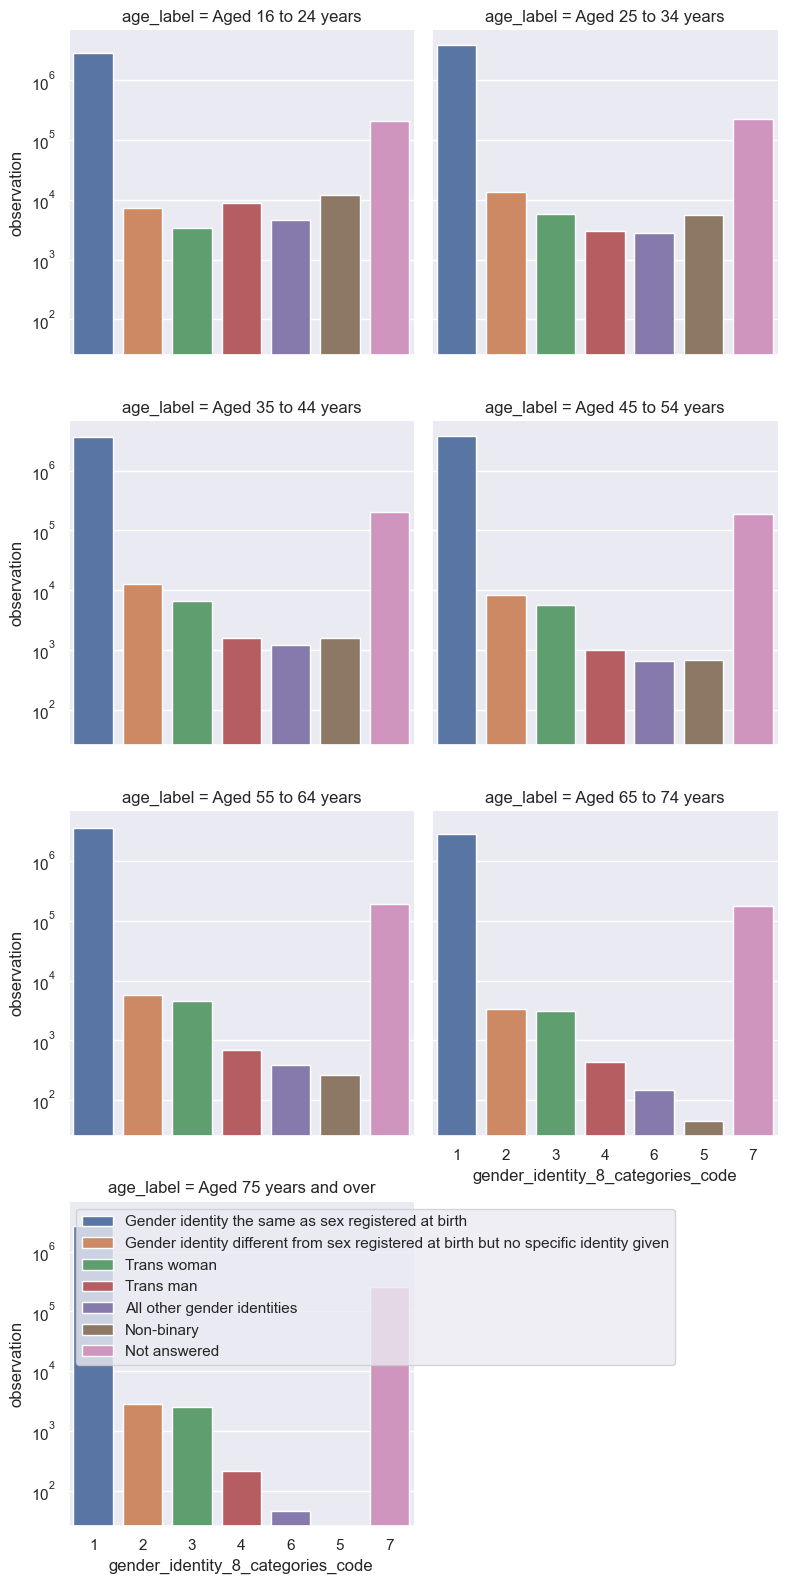

In [82]:
# Create a FacetGrid with subplots for each unique value in the 'age_label' column
g = sns.FacetGrid(female, col='age_label', col_wrap=2, height=4, aspect=1, hue = 'gender_identity_8_categories_label')
g.map(sns.barplot, 'gender_identity_8_categories_code', 'observation', order=female['gender_identity_8_categories_code'].unique())
plt.yscale("log")
plt.legend(loc = 'upper left')

In [83]:
stacked_data = female.pivot_table(index='age_label', columns='gender_identity_8_categories_code', values='group_pct', aggfunc='sum')

In [84]:
stacked_data

gender_identity_8_categories_code,1,2,3,4,5,6,7
age_label,,,,,,,
Aged 16 to 24 years,92.25,0.23,0.11,0.28,0.39,0.15,6.59
Aged 25 to 34 years,93.87,0.32,0.14,0.07,0.14,0.07,5.39
Aged 35 to 44 years,94.20,0.32,0.16,0.04,0.04,0.03,5.21
Aged 45 to 54 years,94.86,0.20,0.14,0.03,0.02,0.02,4.74
Aged 55 to 64 years,94.64,0.15,0.12,0.02,0.01,0.01,5.05
Aged 65 to 74 years,94.01,0.11,0.10,0.01,0.00,0.00,5.76
Aged 75 years and over,91.07,0.10,0.09,0.01,0.00,0.00,8.74


In [85]:
# Our observation column contains some string values, so let's convert it to numeric

age_sex['observation'] = pd.to_numeric(age_sex['observation'], errors='coerce')

# Let's calculate the percentage of each observation value within each age group
# We'll store the results in a new column titled 'group_pct'

age_sex['group_pct'] = age_sex.groupby(['age_label', 'sex_code'])['observation'].apply(lambda x: x / x.sum() * 100).round(2)

/var/folders/dm/468m4xf52c71yhldz5ck50pw0000gn/T/ipykernel_5255/3761084023.py:8: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  age_sex['group_pct'] = age_sex.groupby(['age_label', 'sex_code'])['observation'].apply(lambda x: x / x.sum() * 100).round(2)


In [86]:
age_sex.head()

,gender_identity_8_categories_code,gender_identity_8_categories_label,sex_code,sex_label,age_code,age_label,observation,group_pct
0,1,Gender identity the same as sex registered at ...,1,Female,1,Aged 16 to 24 years,2874920.0,92.25
1,2,Gender identity different from sex registered ...,1,Female,1,Aged 16 to 24 years,7220.0,0.23
2,3,Trans woman,1,Female,1,Aged 16 to 24 years,3380.0,0.11
3,4,Trans man,1,Female,1,Aged 16 to 24 years,8755.0,0.28
4,6,All other gender identities,1,Female,1,Aged 16 to 24 years,4590.0,0.15


In [87]:
age_sex.dtypes

gender_identity_8_categories_code       int64
gender_identity_8_categories_label     object
sex_code                                int64
sex_label                              object
age_code                                int64
age_label                              object
observation                           float64
group_pct                             float64
dtype: object

In [88]:
import re

def shorten_age(age_column):
    age_range = re.findall(r'\d+', age_column)
    if age_range and len(age_range) >= 2:
        return f"{age_range[0]}-{age_range[1]}"
    return age_column

# Apply the function to the age_label column
age_sex['age_label'] = age_sex['age_label'].apply(shorten_age)


# # Let's get a closer look at non_response rates

not_ans = age_sex[age_sex.gender_identity_8_categories_label == 'Not answered']
not_ans = age_sex.loc[age_sex.age_label == 'Aged 75 years and over', 'age_label'] = '75+'

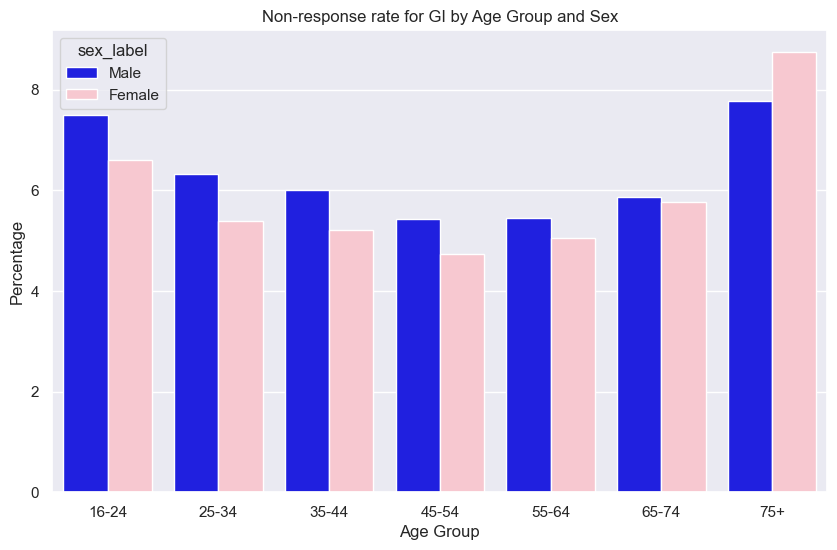

In [89]:
# Let's get a closer look at non_response rates

not_ans = age_sex[age_sex.gender_identity_8_categories_label == 'Not answered']
# Create the grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x = 'age_label', y = 'group_pct', hue = "sex_label", hue_order = ['Male','Female'],palette={'Male': 'blue', 'Female': 'pink'}, data = not_ans)
# Customize the chart
plt.title('Non-response rate for GI by Age Group and Sex')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.show()

In [90]:
# Let's get a closer look at non_response rates

not_ans = female[female.gender_identity_8_categories_label == 'Not answered']

# Religion

In [91]:
# Read-in dataset for religion

rel = pd.read_excel('/Users/loucap/Documents/GitWork/InteractiveGender/Data/religion_gi.xlsx')

# Let's check it out 

rel.head()

,Lower tier local authorities Code,Lower tier local authorities,Gender identity (4 categories) Code,Gender identity (4 categories),Religion (10 categories) Code,Religion (10 categories),Observation
0,E06000001,Hartlepool,-8,Does not apply,-8,Does not apply,0
1,E06000001,Hartlepool,-8,Does not apply,1,No religion,0
2,E06000001,Hartlepool,-8,Does not apply,2,Christian,0
3,E06000001,Hartlepool,-8,Does not apply,3,Buddhist,0
4,E06000001,Hartlepool,-8,Does not apply,4,Hindu,0


In [92]:
# These column names are too wordy, let's rename them.

rel.rename(columns={'Lower tier local authorities Code': 'LA_code', 'Lower tier local authorities': 'LA_name', 'Gender identity (4 categories) Code': 'GI_code', 'Gender identity (4 categories)': 'GI_categories', 'Religion (10 categories) Code': 'Religion_code', 'Religion (10 categories)': 'Religion_categories'}, inplace=True)


In [93]:
rel.Religion_categories.unique()

array(['Does not apply', 'No religion', 'Christian', 'Buddhist', 'Hindu',
       'Jewish', 'Muslim', 'Sikh', 'Other religion', 'Not answered'],
      dtype=object)

In [94]:
rel.Religion_code.unique()

array([-8,  1,  2,  3,  4,  5,  6,  7,  8,  9])

In [95]:

# Nice. Lets now subset it, as we're only interested in non-response
# Let's also get rid of our empty 'Does not apply' category
# For now let's ignore our 'Non-response' for our religious category

non_resp = rel[(rel.GI_code == 3) & (rel.GI_code != -8) & (rel.Religion_code != -8) & (rel.Religion_code != 9)]

# Let's have a look...

non_resp.head(10)

,LA_code,LA_name,GI_code,GI_categories,Religion_code,Religion_categories,Observation
31,E06000001,Hartlepool,3,Not answered,1,No religion,849
32,E06000001,Hartlepool,3,Not answered,2,Christian,1359
33,E06000001,Hartlepool,3,Not answered,3,Buddhist,13
34,E06000001,Hartlepool,3,Not answered,4,Hindu,34
35,E06000001,Hartlepool,3,Not answered,5,Jewish,1
36,E06000001,Hartlepool,3,Not answered,6,Muslim,96
37,E06000001,Hartlepool,3,Not answered,7,Sikh,11
38,E06000001,Hartlepool,3,Not answered,8,Other religion,19
71,E06000002,Middlesbrough,3,Not answered,1,No religion,1398
72,E06000002,Middlesbrough,3,Not answered,2,Christian,2028


In [96]:
# Created an empty column to hold percentages of religions within each LA

non_resp['Percentages'] = ''

for i in non_resp.LA_name.unique():
    
    b = non_resp[non_resp.LA_name == i]
    
    perc = b.Observation / b.Observation.sum() * 100
    
    non_resp.loc[b.index, 'Percentages'] = round(perc, 2)
    

/var/folders/dm/468m4xf52c71yhldz5ck50pw0000gn/T/ipykernel_5255/827211939.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_resp['Percentages'] = ''


In [97]:
sorted_df = non_resp.sort_values(by = ["LA_name", "Percentages"], ascending = [True, False])

sorted_df

,LA_code,LA_name,GI_code,GI_categories,Religion_code,Religion_categories,Observation,Percentages
8832,E07000223,Adur,3,Not answered,2,Christian,728,50.0
8831,E07000223,Adur,3,Not answered,1,No religion,670,46.02
8836,E07000223,Adur,3,Not answered,6,Muslim,31,2.13
8838,E07000223,Adur,3,Not answered,8,Other religion,13,0.89
8833,E07000223,Adur,3,Not answered,3,Buddhist,10,0.69
...,...,...,...,...,...,...,...,...
558,E06000014,York,3,Not answered,8,Other religion,88,1.85
554,E06000014,York,3,Not answered,4,Hindu,47,0.99
553,E06000014,York,3,Not answered,3,Buddhist,35,0.74
555,E06000014,York,3,Not answered,5,Jewish,11,0.23


In [98]:
# Let's now calculate the proportions
# To get better precision and not lose valuable insights I opted to round to 4 decimal places
sorted_df['Proportions'] = (sorted_df['Percentages'].astype(float) / 100).round(4)

In [99]:
sorted_df.head()

,LA_code,LA_name,GI_code,GI_categories,Religion_code,Religion_categories,Observation,Percentages,Proportions
8832,E07000223,Adur,3,Not answered,2,Christian,728,50.0,0.5000
8831,E07000223,Adur,3,Not answered,1,No religion,670,46.02,0.4602
8836,E07000223,Adur,3,Not answered,6,Muslim,31,2.13,0.0213
8838,E07000223,Adur,3,Not answered,8,Other religion,13,0.89,0.0089
8833,E07000223,Adur,3,Not answered,3,Buddhist,10,0.69,0.0069


In [100]:

sorted_df['Calc'] = np.where(sorted_df['Proportions'] > 0, - sorted_df['Proportions'] * np.log(sorted_df['Proportions']), 0)

#

# sorted_df['Calc'] = - sorted_df['Proportions'] * np.log(sorted_df['Proportions'])

# Created an empty column titled Shannon_idx
sorted_df['Shannon_idx'] = ''

for i in sorted_df.LA_code.unique():
    
    b = sorted_df[sorted_df.LA_code == i]
    summed = sum(b.Calc)
    
    sorted_df.loc[b.index, 'Shannon_idx'] = summed


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [101]:
sorted_df.head()

,LA_code,LA_name,GI_code,GI_categories,Religion_code,Religion_categories,Observation,Percentages,Proportions,Calc,Shannon_idx
8832,E07000223,Adur,3,Not answered,2,Christian,728,50.0,0.5000,0.346574,0.881446
8831,E07000223,Adur,3,Not answered,1,No religion,670,46.02,0.4602,0.357159,0.881446
8836,E07000223,Adur,3,Not answered,6,Muslim,31,2.13,0.0213,0.081985,0.881446
8838,E07000223,Adur,3,Not answered,8,Other religion,13,0.89,0.0089,0.042023,0.881446
8833,E07000223,Adur,3,Not answered,3,Buddhist,10,0.69,0.0069,0.034336,0.881446


In [102]:
# Assuming your DataFrame is named df and it contains 'LA_name' and 'Shannon_idx' columns
unique_shannon_df = sorted_df[['LA_name', 'Shannon_idx']].drop_duplicates(subset=['LA_name'])
unique_shannon_df.sort_values(by = 'Shannon_idx', ascending = False).head()

,LA_name,Shannon_idx
11712,Hillingdon,1.620787
11152,Barnet,1.604286
11752,Hounslow,1.60157
11392,Ealing,1.591577
6272,Oadby and Wigston,1.575674


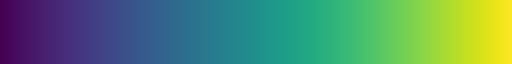

In [103]:
cmap = plt.get_cmap("viridis")
cmap

In [104]:
normalized_shannon = (sorted_df['Shannon_idx'] - sorted_df['Shannon_idx'].min()) / (sorted_df['Shannon_idx'].max() - sorted_df['Shannon_idx'].min())
normalized_shannon

8832    0.205076
8831    0.205076
8836    0.205076
8838    0.205076
8833    0.205076
          ...   
558     0.289571
554     0.289571
553     0.289571
555     0.289571
557     0.289571
Name: Shannon_idx, Length: 2648, dtype: object

In [105]:
from bokeh.models import LogColorMapper

color_map = LogColorMapper(palette="Viridis256", low=sorted_df.Shannon_idx.min(), high=sorted_df.Shannon_idx.max())

color_map

LogColorMapper(id='2533', ...)

In [106]:
# Create a mapping between LA_code and Shannon_idx
la_code_to_shannon_idx = sorted_df.set_index('LA_code')['Shannon_idx'].to_dict()

In [107]:
merged_df2_['Shannon_idx'] = merged_df2_['LA_code'].map(la_code_to_shannon_idx)


In [108]:
from bokeh.transform import factor_cmap, factor_mark
from bokeh.plotting import figure, show
from bokeh.palettes import Category10
from bokeh.models import ColorBar, BasicTicker, PrintfTickFormatter

tool = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("name","@LA_name"),
    ("Shannon_idx", "@Shannon_idx")
]
# p1.legend.location = "bottom_right"
# p1.legend.click_policy="hide"
# p1.legend.title = "Regions"

# regions = merged_df2.region_x.unique()
# urban = merged_df2.Urb_Rur.unique()

p2 = figure(title="Relationship between Non-response Rate and Non-English Speakers", x_axis_label="Non-response Rate", y_axis_label="Percentage of Non-English Speakers", tooltips = tool)
output_notebook()

p2.scatter("Percentage", "Non-response_rate", source = merged_df2_, fill_alpha = 0.5, size = 10,  color={'field': 'Shannon_idx', 'transform': color_map})

color_bar = ColorBar(color_mapper=color_map,
                     title='Shannon Index',
                     ticker=BasicTicker(desired_num_ticks=5),
                     formatter=PrintfTickFormatter(format='%.2f'))

# Add the color bar to the plot
p2.add_layout(color_bar, 'right')


show(p2)

Loading BokehJS ...

## % Non-response per religious category

In [109]:
# Get rid of categories which are N/A and have 0 counts

rel = rel[(rel.GI_code != -8) & (rel.Religion_code != -8) & (rel.Religion_code != 9)]

In [110]:
# Let's calc the % of each religious group and their GI answers for each LA

rel['Percentages'] = ''

for i in rel.LA_name.unique():
    
    b = rel[rel.LA_name == i]
    
    perc = b.Observation / b.Observation.sum() * 100
    
    rel.loc[b.index, 'Percentages'] = round(perc, 2)

In [111]:
# Created a column which holds the total amount of people in each LA e.g. in Hartlepool there's 74686 people
# This will help me with next calculation

rel['Total_counts'] = ''

for i in rel.LA_name.unique():
    
    b = rel[rel.LA_name == i]
    
    tot = b.Observation.sum()
    
    rel.loc[b.index, 'Total_counts'] = tot

### ATHEISTS

Let's explore the relationship between the % of atheists in different LAs, and the Non-response rate

In [112]:
# First, we subset our dataframe to only get data where religion_category == No religion

atheist = rel[(rel.Religion_categories == 'No religion')]
atheist.head(10)

,LA_code,LA_name,GI_code,GI_categories,Religion_code,Religion_categories,Observation,Percentages,Total_counts
11,E06000001,Hartlepool,1,Gender identity the same as sex registered at ...,1,No religion,26470,37.34,70895
21,E06000001,Hartlepool,2,Gender identity different from sex registered ...,1,No religion,160,0.23,70895
31,E06000001,Hartlepool,3,Not answered,1,No religion,849,1.2,70895
51,E06000002,Middlesbrough,1,Gender identity the same as sex registered at ...,1,No religion,37057,34.39,107747
61,E06000002,Middlesbrough,2,Gender identity different from sex registered ...,1,No religion,302,0.28,107747
71,E06000002,Middlesbrough,3,Not answered,1,No religion,1398,1.3,107747
91,E06000003,Redcar and Cleveland,1,Gender identity the same as sex registered at ...,1,No religion,39556,37.16,106451
101,E06000003,Redcar and Cleveland,2,Gender identity different from sex registered ...,1,No religion,215,0.2,106451
111,E06000003,Redcar and Cleveland,3,Not answered,1,No religion,1306,1.23,106451
131,E06000004,Stockton-on-Tees,1,Gender identity the same as sex registered at ...,1,No religion,55898,37.24,150096


In [113]:
# So, whilst we have the % of atheists for each GI category for each individual LA...
# We now want to know the total % of atheists in each LA

atheist['Total_Atheist'] = ''

for i in atheist.LA_code.unique():
    
    v = atheist[atheist.LA_code == i]
    
    perc = v.Percentages.sum()
    
    atheist.loc[v.index, 'Total_Atheist'] = perc

/var/folders/dm/468m4xf52c71yhldz5ck50pw0000gn/T/ipykernel_5255/1616163002.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atheist['Total_Atheist'] = ''


In [114]:
# Now we have...
# e.g. Hartlepool, our total % of atheists is 36.79% and out of that number...
# our non-response rate for atheists in this LA is 1.14%

atheist.head()

,LA_code,LA_name,GI_code,GI_categories,Religion_code,Religion_categories,Observation,Percentages,Total_counts,Total_Atheist
11,E06000001,Hartlepool,1,Gender identity the same as sex registered at ...,1,No religion,26470,37.34,70895,38.77
21,E06000001,Hartlepool,2,Gender identity different from sex registered ...,1,No religion,160,0.23,70895,38.77
31,E06000001,Hartlepool,3,Not answered,1,No religion,849,1.2,70895,38.77
51,E06000002,Middlesbrough,1,Gender identity the same as sex registered at ...,1,No religion,37057,34.39,107747,35.97
61,E06000002,Middlesbrough,2,Gender identity different from sex registered ...,1,No religion,302,0.28,107747,35.97


In [115]:
# In terms of my scatterplot, I want to subset my dataframe again so that I'm only looking at non-response for GI

x = atheist[atheist.GI_categories == 'Not answered']

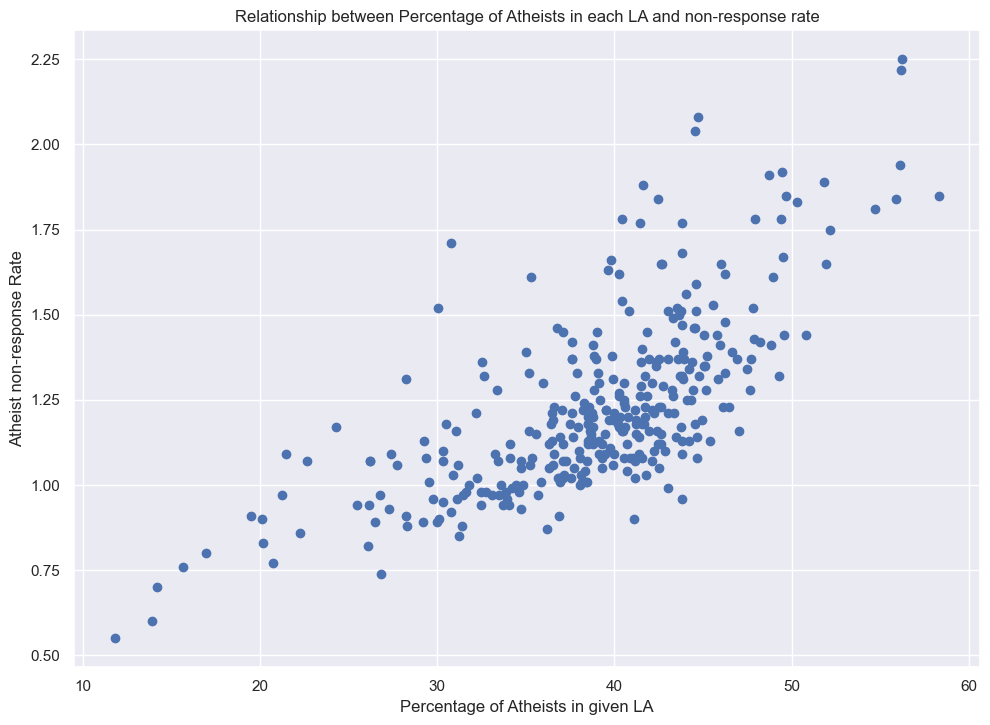

In [116]:
# Create a scatterplot to visualize the relationship between non-response rates and the percentage of non-English speakers
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import numpy as np

plt.scatter(x['Total_Atheist'], x['Percentages'])


# # Find nearest neighbors
# X = x[['Perc', 'Percentages']].values
# nbrs = NearestNeighbors(n_neighbors=2).fit(X)
# distances, indices = nbrs.kneighbors(X)
# min_distance = 0.3

# for i, row in x.iterrows():
#     if distances[i][1] >= min_distance:
#         plt.annotate(row['LA_name'], (row['Perc'], row['Percentages']), fontsize=8, alpha=0.6)

plt.xlabel('Percentage of Atheists in given LA')
plt.ylabel('Atheist non-response Rate')
plt.title('Relationship between Percentage of Atheists in each LA and non-response rate')
plt.show()

In [117]:
from bokeh.transform import factor_cmap, factor_mark
from bokeh.plotting import figure, show
from bokeh.palettes import Category10

tool = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("name","@LA_name"),
]
# p1.legend.location = "bottom_right"
# p1.legend.click_policy="hide"
# p1.legend.title = "Regions"

# regions = df.region_x.unique()
# urban = df.Urb_Rur.unique()


p2 = figure(title="Relationship between % of Atheists in given LA, and their Non-response rate", y_axis_label="Non-response Rate", x_axis_label="Percentage of Atheists in given LA", tooltips = tool)
output_notebook()

p2.scatter("Total_Atheist", "Percentages", source = x, fill_alpha = 0.5, size = 10)

show(p2)

Loading BokehJS ...

### CHRISTIANS

Let's now do the same for Christians.

In [118]:
christian = rel[(rel.Religion_categories == 'Christian')]
christian.head(10)

,LA_code,LA_name,GI_code,GI_categories,Religion_code,Religion_categories,Observation,Percentages,Total_counts
12,E06000001,Hartlepool,1,Gender identity the same as sex registered at ...,2,Christian,40406,56.99,70895
22,E06000001,Hartlepool,2,Gender identity different from sex registered ...,2,Christian,105,0.15,70895
32,E06000001,Hartlepool,3,Not answered,2,Christian,1359,1.92,70895
52,E06000002,Middlesbrough,1,Gender identity the same as sex registered at ...,2,Christian,54150,50.26,107747
62,E06000002,Middlesbrough,2,Gender identity different from sex registered ...,2,Christian,321,0.3,107747
72,E06000002,Middlesbrough,3,Not answered,2,Christian,2028,1.88,107747
92,E06000003,Redcar and Cleveland,1,Gender identity the same as sex registered at ...,2,Christian,61584,57.85,106451
102,E06000003,Redcar and Cleveland,2,Gender identity different from sex registered ...,2,Christian,131,0.12,106451
112,E06000003,Redcar and Cleveland,3,Not answered,2,Christian,2077,1.95,106451
132,E06000004,Stockton-on-Tees,1,Gender identity the same as sex registered at ...,2,Christian,83059,55.34,150096


In [119]:
# Let's create a new column called 'Total_christian'
# We will group the christian df by LA_code and then sum %s for each group
# Then merge on the christian df on the LA_code column - new column created called..

christian['Total_Christian'] = ''

for i in christian.LA_code.unique():
    
    v = christian[christian.LA_code == i]
    
    perc = v.Percentages.sum()
    
    christian.loc[v.index, 'Total_Christian'] = perc

/var/folders/dm/468m4xf52c71yhldz5ck50pw0000gn/T/ipykernel_5255/2300404450.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  christian['Total_Christian'] = ''


In [120]:
christian.head()

,LA_code,LA_name,GI_code,GI_categories,Religion_code,Religion_categories,Observation,Percentages,Total_counts,Total_Christian
12,E06000001,Hartlepool,1,Gender identity the same as sex registered at ...,2,Christian,40406,56.99,70895,59.06
22,E06000001,Hartlepool,2,Gender identity different from sex registered ...,2,Christian,105,0.15,70895,59.06
32,E06000001,Hartlepool,3,Not answered,2,Christian,1359,1.92,70895,59.06
52,E06000002,Middlesbrough,1,Gender identity the same as sex registered at ...,2,Christian,54150,50.26,107747,52.44
62,E06000002,Middlesbrough,2,Gender identity different from sex registered ...,2,Christian,321,0.3,107747,52.44


In [121]:
# Now we just want our non-response

b = christian[christian.GI_categories == 'Not answered']

In [122]:
from bokeh.transform import factor_cmap, factor_mark
from bokeh.plotting import figure, show
from bokeh.palettes import Category10

tool = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("name","@LA_name"),
]
# p1.legend.location = "bottom_right"
# p1.legend.click_policy="hide"
# p1.legend.title = "Regions"

# regions = df.region_x.unique()
# urban = df.Urb_Rur.unique()


p2 = figure(title="Relationship between % of Christians in given LA, and their Non-response rate", y_axis_label="Non-response Rate", x_axis_label="Percentage of Christians in given LA", tooltips = tool)
output_notebook()

p2.scatter("Total_Christian", "Percentages", source = b, fill_alpha = 0.5, size = 10)

show(p2)

Loading BokehJS ...

In [123]:
from scipy.stats import pearsonr


correlation, _ = pearsonr(b.Total_Christian, b.Percentages)

print(f"Pearson correlation coefficient: {correlation:.2f}")

Pearson correlation coefficient: 0.18


In [124]:
sorted_df.Religion_categories.unique()

array(['Christian', 'No religion', 'Muslim', 'Other religion', 'Buddhist',
       'Jewish', 'Hindu', 'Sikh'], dtype=object)

### MUSLIMS

In [125]:
muslim = rel[(rel.Religion_categories == 'Muslim')]
muslim

,LA_code,LA_name,GI_code,GI_categories,Religion_code,Religion_categories,Observation,Percentages,Total_counts
16,E06000001,Hartlepool,1,Gender identity the same as sex registered at ...,6,Muslim,672,0.95,70895
26,E06000001,Hartlepool,2,Gender identity different from sex registered ...,6,Muslim,22,0.03,70895
36,E06000001,Hartlepool,3,Not answered,6,Muslim,96,0.14,70895
56,E06000002,Middlesbrough,1,Gender identity the same as sex registered at ...,6,Muslim,8856,8.22,107747
66,E06000002,Middlesbrough,2,Gender identity different from sex registered ...,6,Muslim,232,0.22,107747
...,...,...,...,...,...,...,...,...,...
13186,W06000023,Powys,2,Gender identity different from sex registered ...,6,Muslim,11,0.01,104683
13196,W06000023,Powys,3,Not answered,6,Muslim,25,0.02,104683
13216,W06000024,Merthyr Tydfil,1,Gender identity the same as sex registered at ...,6,Muslim,203,0.45,45247
13226,W06000024,Merthyr Tydfil,2,Gender identity different from sex registered ...,6,Muslim,0,0.0,45247


In [126]:
muslim['Total_Muslim'] = ''

for i in muslim.LA_code.unique():
    
    v = muslim[muslim.LA_code == i]
    
    perc = v.Percentages.sum()
    
    muslim.loc[v.index, 'Total_Muslim'] = perc

/var/folders/dm/468m4xf52c71yhldz5ck50pw0000gn/T/ipykernel_5255/2962736491.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  muslim['Total_Muslim'] = ''


In [127]:
c = muslim[muslim.GI_categories == 'Not answered']

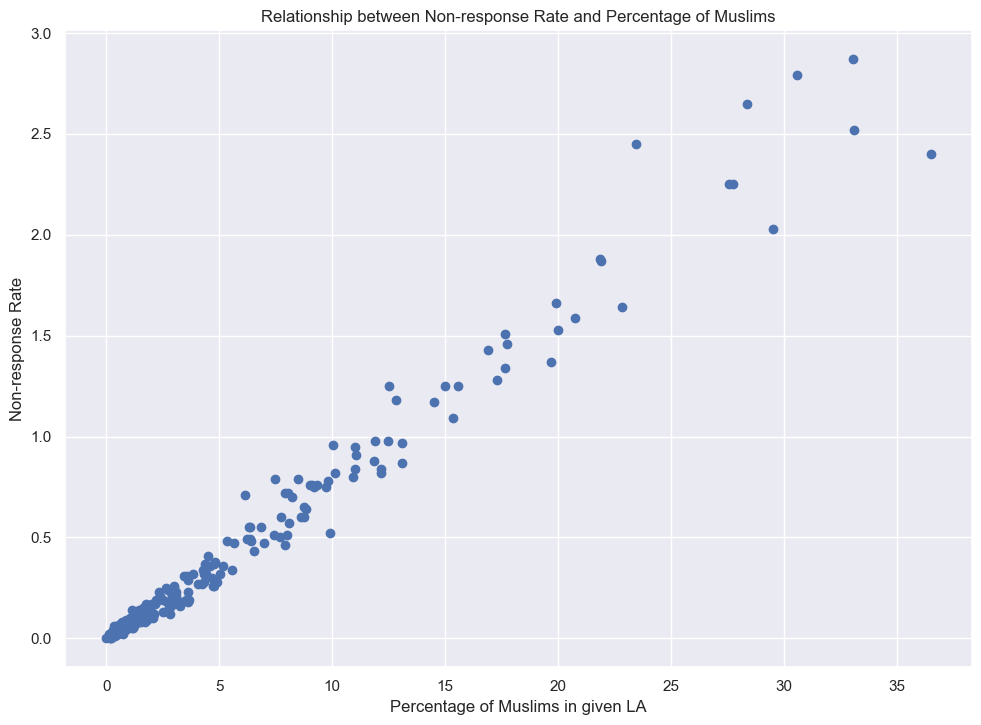

In [128]:


# Create a scatterplot to visualize the relationship between non-response rates and the percentage of non-English speakers
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import numpy as np

plt.scatter(c['Total_Muslim'], c['Percentages'])


# # Find nearest neighbors
# X = x[['Perc', 'Percentages']].values
# nbrs = NearestNeighbors(n_neighbors=2).fit(X)
# distances, indices = nbrs.kneighbors(X)
# min_distance = 0.3

# for i, row in x.iterrows():
#     if distances[i][1] >= min_distance:
#         plt.annotate(row['LA_name'], (row['Perc'], row['Percentages']), fontsize=8, alpha=0.6)

plt.xlabel('Percentage of Muslims in given LA')
plt.ylabel('Non-response Rate')
plt.title('Relationship between Non-response Rate and Percentage of Muslims')
plt.show()

In [129]:
from bokeh.transform import factor_cmap, factor_mark
from bokeh.plotting import figure, show
from bokeh.palettes import Category10

tool = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("name","@LA_name"),
]
# p1.legend.location = "bottom_right"
# p1.legend.click_policy="hide"
# p1.legend.title = "Regions"

# regions = df.region_x.unique()
# urban = df.Urb_Rur.unique()


p2 = figure(title="Relationship between % of Muslims in given LA, and their Non-response rate", y_axis_label="Non-response Rate", x_axis_label="Percentage of Muslims in given LA", tooltips = tool)
output_notebook()

p2.scatter("Total_Muslim", "Percentages", source = c, fill_alpha = 0.5, size = 10)

show(p2)

Loading BokehJS ...

In [130]:
from scipy.stats import pearsonr


correlation, _ = pearsonr(c.Total_Muslim, c.Percentages)

print(f"Pearson correlation coefficient: {correlation:.2f}")

Pearson correlation coefficient: 0.99


In [131]:
muslim.sort_values(by = 'Total_Muslim', ascending = False).head(6)

,LA_code,LA_name,GI_code,GI_categories,Religion_code,Religion_categories,Observation,Percentages,Total_counts,Total_Muslim
12226,E09000030,Tower Hamlets,2,Gender identity different from sex registered ...,6,Muslim,1385,0.59,234813,36.5
12216,E09000030,Tower Hamlets,1,Gender identity the same as sex registered at ...,6,Muslim,78676,33.51,234813,36.5
12236,E09000030,Tower Hamlets,3,Not answered,6,Muslim,5639,2.4,234813,36.5
12016,E09000025,Newham,1,Gender identity the same as sex registered at ...,6,Muslim,77428,30.04,257727,33.12
12026,E09000025,Newham,2,Gender identity different from sex registered ...,6,Muslim,1431,0.56,257727,33.12
12036,E09000025,Newham,3,Not answered,6,Muslim,6504,2.52,257727,33.12


In [132]:
# What I'd need to do for each LA_name:

#     find each unique religion_category e.g. Muslim
    
#     Sum up the observation number for each religious category e.g. Sum up number of Muslims
    
#     Divide that number by the total observation number (sum all religious categories)

### OTHER RELIGION


In [133]:
other = rel[(rel.Religion_categories == 'Other religion')]

In [134]:
other['Total_Other'] = ''

for i in other.LA_code.unique():
    
    v = other[other.LA_code == i]
    
    perc = v.Percentages.sum()
    
    other.loc[v.index, 'Total_Other'] = perc

/var/folders/dm/468m4xf52c71yhldz5ck50pw0000gn/T/ipykernel_5255/2061329549.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other['Total_Other'] = ''


In [135]:
d = other[other.GI_categories == 'Not answered']

In [136]:
from bokeh.transform import factor_cmap, factor_mark
from bokeh.plotting import figure, show
from bokeh.palettes import Category10

tool = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("name","@LA_name"),
]
# p1.legend.location = "bottom_right"
# p1.legend.click_policy="hide"
# p1.legend.title = "Regions"

# regions = df.region_x.unique()
# urban = df.Urb_Rur.unique()


p2 = figure(title="Relationship between % of Other religions in given LA, and their Non-response rate", y_axis_label="Non-response Rate", x_axis_label="Percentage of Other religions in given LA", tooltips = tool)
output_notebook()

p2.scatter("Total_Other", "Percentages", source = d, fill_alpha = 0.5, size = 10)

show(p2)

Loading BokehJS ...

In [137]:
from scipy.stats import pearsonr


correlation, _ = pearsonr(d.Total_Other, d.Percentages)

print(f"Pearson correlation coefficient: {correlation:.2f}")

Pearson correlation coefficient: 0.93


In [138]:
from scipy.stats import spearmanr

correlation_coefficient, p_value = spearmanr(d.Total_Other, d.Percentages)

print(f"Spearman's rank correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Spearman's rank correlation coefficient: 0.7865098022141728
P-value: 7.65707012640405e-71


### BUDDHIST

In [139]:
buddhist = rel[(rel.Religion_categories == 'Buddhist')]

In [140]:
buddhist = buddhist.merge(other.groupby('LA_code')['Percentages'].sum().reset_index(name='Total_Buddhist'), on='LA_code')

In [141]:
e = buddhist[buddhist.GI_categories == 'Not answered']

In [142]:
from bokeh.transform import factor_cmap, factor_mark
from bokeh.plotting import figure, show
from bokeh.palettes import Category10

tool = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("name","@LA_name"),
]
# p1.legend.location = "bottom_right"
# p1.legend.click_policy="hide"
# p1.legend.title = "Regions"

# regions = df.region_x.unique()
# urban = df.Urb_Rur.unique()


p2 = figure(title="Relationship between % of Buddhists in given LA, and their Non-response rate", y_axis_label="Non-response Rate", x_axis_label="Percentage of Buddhists in given LA", tooltips = tool)
output_notebook()

p2.scatter("Total_Buddhist", "Percentages", source = e, fill_alpha = 0.5, size = 10)

show(p2)

Loading BokehJS ...

In [143]:
from scipy.stats import pearsonr


correlation, _ = pearsonr(e.Total_Buddhist, e.Percentages)

print(f"Pearson correlation coefficient: {correlation:.2f}")

Pearson correlation coefficient: 0.42


In [144]:
from scipy.stats import spearmanr

correlation_coefficient, p_value = spearmanr(e.Total_Buddhist, e.Percentages)

print(f"Spearman's rank correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Spearman's rank correlation coefficient: 0.627403167169186
P-value: 1.2684169526057954e-37


### JEWISH


In [145]:
jewish = rel[(rel.Religion_categories == 'Jewish')]

In [146]:
jewish = jewish.merge(other.groupby('LA_code')['Percentages'].sum().reset_index(name='Total_Jewish'), on='LA_code')

In [147]:
f = jewish[jewish.GI_categories == 'Not answered']

In [148]:
from bokeh.transform import factor_cmap, factor_mark
from bokeh.plotting import figure, show
from bokeh.palettes import Category10

tool = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("name","@LA_name"),
]
# p1.legend.location = "bottom_right"
# p1.legend.click_policy="hide"
# p1.legend.title = "Regions"

# regions = df.region_x.unique()
# urban = df.Urb_Rur.unique()


p2 = figure(title="Relationship between % of Jewish people in given LA, and their Non-response rate", y_axis_label="Non-response Rate", x_axis_label="Percentage of Jewsish people in given LA", tooltips = tool)
output_notebook()

p2.scatter("Total_Jewish", "Percentages", source = f, fill_alpha = 0.5, size = 10)

show(p2)

Loading BokehJS ...

In [149]:
from scipy.stats import pearsonr


correlation, _ = pearsonr(f.Total_Jewish, f.Percentages)

print(f"Pearson correlation coefficient: {correlation:.2f}")

Pearson correlation coefficient: 0.36


In [150]:
from scipy.stats import spearmanr

correlation_coefficient, p_value = spearmanr(f.Total_Jewish, f.Percentages)

print(f"Spearman's rank correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Spearman's rank correlation coefficient: 0.41623053824286305
P-value: 2.6660478272590227e-15


### HINDU


In [151]:
hindus = rel[(rel.Religion_categories == 'Hindu')]

In [152]:
hindus = hindus.merge(other.groupby('LA_code')['Percentages'].sum().reset_index(name='Total_Hindu'), on='LA_code')

In [153]:
g = hindus[hindus.GI_categories == 'Not answered']

In [154]:
from bokeh.transform import factor_cmap, factor_mark
from bokeh.plotting import figure, show
from bokeh.palettes import Category10

tool = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("name","@LA_name"),
]
# p1.legend.location = "bottom_right"
# p1.legend.click_policy="hide"
# p1.legend.title = "Regions"

# regions = df.region_x.unique()
# urban = df.Urb_Rur.unique()


p2 = figure(title="Relationship between % of Hindus in given LA, and their Non-response rate", y_axis_label="Non-response Rate", x_axis_label="Percentage of Hindus in given LA", tooltips = tool)
output_notebook()

p2.scatter("Total_Hindu", "Percentages", source = g, fill_alpha = 0.5, size = 10)

show(p2)

Loading BokehJS ...

In [155]:
from scipy.stats import spearmanr

correlation_coefficient, p_value = spearmanr(g.Total_Hindu, g.Percentages)

print(f"Spearman's rank correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Spearman's rank correlation coefficient: 0.2784568494236104
P-value: 2.617275679499904e-07


### SIKH

In [156]:
sikh = rel[(rel.Religion_categories == 'Sikh')]

In [157]:
sikh = sikh.merge(other.groupby('LA_code')['Percentages'].sum().reset_index(name='Total_Sikh'), on='LA_code')

In [158]:
h = sikh[sikh.GI_categories == 'Not answered']

In [159]:
from bokeh.transform import factor_cmap, factor_mark
from bokeh.plotting import figure, show
from bokeh.palettes import Category10

tool = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("name","@LA_name"),
]
# p1.legend.location = "bottom_right"
# p1.legend.click_policy="hide"
# p1.legend.title = "Regions"

# regions = df.region_x.unique()
# urban = df.Urb_Rur.unique()


p2 = figure(title="Relationship between % of Sikhs in given LA, and their Non-response rate", y_axis_label="Non-response Rate", x_axis_label="Percentage of Sikhs in given LA", tooltips = tool)
output_notebook()

p2.scatter("Total_Sikh", "Percentages", source = h, fill_alpha = 0.5, size = 10)

show(p2)

Loading BokehJS ...

In [160]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

o_norm = d.copy()

o_norm[['Total_Other', 'Percentages']] = scaler.fit_transform(o_norm[['Total_Other', 'Percentages']])

In [161]:
# List of DataFrames and their corresponding suffixes
dataframes = [(x, '_Atheist'), (b, '_Christian'), (c, '_Muslim'), (d, '_Other'), (e, '_Buddhist'), (f, '_Jewish'), (g, '_Hindu'), (h, '_Sikh')]

# Merge the DataFrames one by one
merged_df = dataframes[0][0]  # Initialize with the first DataFrame
for df, suffix in dataframes[1:]:
    merged_df = merged_df.merge(df, on=['LA_code', 'LA_name', 'GI_code', 'GI_categories'], suffixes=('', suffix))
#     merged_df = merged_df.rename(columns={'Total': f'Total{suffix}'})

In [162]:
merged_df = merged_df.rename(columns = {'Percentages': 'Percentages_Atheist'})

# Outputs

In [164]:
merged_df.rename(columns={'Total_counts': f'Total_counts{suffix}', 'Total': f'Total{suffix}'})


,LA_code,LA_name,GI_code,GI_categories,Religion_code,Religion_categories,Observation,Percentages_Atheist,Total_counts_Sikh,Total_Atheist,...,Observation_Hindu,Percentages_Hindu,Total_counts_Hindu,Total_Hindu,Religion_code_Sikh,Religion_categories_Sikh,Observation_Sikh,Percentages_Sikh,Total_counts_Sikh,Total_Sikh
0,E06000001,Hartlepool,3,Not answered,1,No religion,849,1.2,70895,38.77,...,34,0.05,70895,0.38,7,Sikh,11,0.02,70895,0.38
1,E06000002,Middlesbrough,3,Not answered,1,No religion,1398,1.3,107747,35.97,...,57,0.05,107747,0.4,7,Sikh,32,0.03,107747,0.4
2,E06000003,Redcar and Cleveland,3,Not answered,1,No religion,1306,1.23,106451,38.59,...,6,0.01,106451,0.44,7,Sikh,2,0.0,106451,0.44
3,E06000004,Stockton-on-Tees,3,Not answered,1,No religion,1613,1.07,150096,38.48,...,13,0.01,150096,0.34,7,Sikh,22,0.01,150096,0.34
4,E06000005,Darlington,3,Not answered,1,No religion,940,1.12,83762,39.32,...,21,0.03,83762,0.45,7,Sikh,24,0.03,83762,0.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,W06000020,Torfaen,3,Not answered,1,No religion,1289,1.83,70599,50.32,...,3,0.0,70599,0.66,7,Sikh,3,0.0,70599,0.66
327,W06000021,Monmouthshire,3,Not answered,1,No religion,1095,1.49,73676,43.34,...,13,0.02,73676,0.64,7,Sikh,4,0.01,73676,0.64
328,W06000022,Newport,3,Not answered,1,No religion,1803,1.5,120274,43.66,...,20,0.02,120274,0.55,7,Sikh,15,0.01,120274,0.55
329,W06000023,Powys,3,Not answered,1,No religion,1922,1.84,104683,42.48,...,17,0.02,104683,0.83,7,Sikh,2,0.0,104683,0.83


In [166]:
# Dfs for scatterplots


merged_df2_.to_csv('/Users/loucap/Documents/GitWork/InteractiveGender/Data/cleaned_lang_GI.csv', index = False)
rural_df.to_csv('/Users/loucap/Documents/GitWork/InteractiveGender/Data/urban_rural_GI.csv', index = False)
# merged_df2_1.to_csv('/Users/loucap/Documents/GitWork/InteractiveGender/Data/urban_rural.csv')
merged_df.to_csv('/Users/loucap/Documents/GitWork/InteractiveGender/Data/cleaned_religion_GI.csv')


## Ignore beyond...

In [ ]:
lang.sort_values(by = ['LA_code'], ascending = [True])

In [ ]:
lang[(lang['LA_name'] == 'Merthyr Tydfil') & (lang['Non-English'] == True)]

In [ ]:
b = lang.sort_values(by = ['LA_code', 'Percentages'], ascending = [True,False])

In [ ]:
b[b['Non-English'] == True]

In [ ]:
lang['Non-English'] = (lang['ML_code'] != 1) & (lang['ML_code'] != -8)

In [ ]:
non_english_pct = lang.groupby(['LA_code', 'LA_name']).agg({'Non-English': 'mean'}).reset_index()

In [ ]:
non_english_pct

In [ ]:
lang.groupby(['LA_code', 'LA_name']).agg({'Non-English': sum})

In [ ]:
non_english_pct

In [ ]:
lang

In [ ]:
# Let's try and merge both datasets - GI (df) and LANG (lang)

# Merge the data
# merged_df = pd.merge(not_ans, lang, on='LA_code')

# pivot_df = merged_df.pivot_table(values='Observation_y', index='LA_code', columns='ML_categories', aggfunc='sum')

# # Let's get rid of Percentages column
# merged_df = merged_df.drop('Percentages', axis = 1)

# # Snapshot of the data
# merged_df.head(10)

In [ ]:
# la_names = b.LA_name.unique().tolist()

In [ ]:
# merged_df.sort_values(by = 'Observation_y', ascending = False).head(50)

In [ ]:
# Out of interest, let's sort the data by Observation_y for each LA_code

# c = []

# for i in merged_df.LA_name_x.unique():
#     b = merged_df[merged_df.LA_name_x == i].sort_values(by='Observation_y', ascending = False)
    
# b

In [ ]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
# display(merged_df.sort_values(by = ['LA_code', 'Observation_y'], ascending = [True,False]))

In [ ]:
# stockport = merged_df[merged_df.LA_name_x == 'Stockport']

# grouped = stockport.groupby(['ML_categories'])

In [ ]:
# stockport

In [ ]:
# stockport['non_response_rate'] = stockport['Observation_y'] / stockport['Observation_y'].sum() * 100

In [ ]:
# non_response_rate

In [ ]:
# stockport.sort_values(by = ['non_response_rate'], ascending = False)

In [ ]:
# stockport[2:300].plot(kind = 'scatter', x = 'ML_code', y = 'non_response_rate')

In [ ]:
# Group the data by language category

# grouped_df = merged_df.groupby(['ML_categories'])

# grouped_df.head()

In [ ]:
# grouped_df.tail()[:2]

# Other interesting stuff...

## Percentage-wise

In [ ]:
df['Region'] = ''

regions = {
    'East':'Babergh,Basildon,Bedford,Braintree,Breckland,Broadland,Broxbourne,Cambridge,Castle Point,Central Bedfordshire,Chelmsford,Colchester,Dacorum,East Cambridgeshire,East Hertfordshire,East Suffolk,Epping Forest,Fenland,Great Yarmouth,Harlow,Hertsmere,Huntingdonshire,Ipswich,Kings Lynn and West Norfolk,Maldon,Mid Suffolk,North Hertfordshire,North Norfolk,Norwich,Peterborough,Rochford,South Cambridgeshire,South Norfolk,Southend-on-Sea,St. Albans,Stevenage,Tendring,Three Rivers,Thurrock,Uttlesford,West Suffolk'.split(","),
    'East Midlands':'Amber Valley,Ashfield,Bassetlaw,Blaby,Bolsover,Boston,Broxtowe,Charnwood,Chesterfield,Derby,Derbyshire Dales,East Lindsey,Erewash,Gedling,Harborough,High Peak,Hinckley and Bosworth,Leicester,Lincoln,Mansfield,Melton,Newark and Sherwood,North East Derbyshire,North Kesteven,North West Leicestershire,North Northamptonshire,Nottingham,Oadby and Wigston,Rushcliffe,Rutland,South Derbyshire,South Holland,South Kesteven,West Lindsey,West Northamptonshire'.split(","),
    'North East':'County Durham,Darlington,Gateshead,Hartlepool,Middlesbrough,Newcastle upon Tyne,North Tyneside,Northumberland,Redcar and Cleveland,South Tyneside,Stockton-on-Tees,Sunderland'.split(","),
    'North West':'Allerdale,Barrow-in-Furness,Blackburn with Darwen,Blackpool,Bolton,Burnley,Bury,Carlisle,Cheshire East,Cheshire West and Chester,Chorley,Copeland,Eden,Fylde,Halton,Hyndburn,Knowsley,Lancaster,Liverpool,Manchester,Oldham,Pendle,Preston,Ribble Valley,Rochdale,Rossendale,Salford,Sefton,South Lakeland,South Ribble,St. Helens,Stockport,Tameside,Trafford,Warrington,West Lancashire,Wigan,Wirral,Wyre'.split(","),
    'South East':'Folkestone and Hythe,Adur,Arun,Ashford,Basingstoke and Deane,Bracknell Forest,Brighton and Hove,Buckinghamshire,Canterbury,Cherwell,Chichester,Crawley,Dartford,Dover,East Hampshire,Eastbourne,Eastleigh,Elmbridge,Epsom and Ewell,Fareham,Folkestone & Hythe,Gosport,Gravesham,Guildford,Hart,Hastings,Havant,Horsham,Isle of Wight,Lewes,Maidstone,Medway,Mid Sussex,Milton Keynes,Mole Valley,New Forest,Oxford,Portsmouth,Reading,Reigate and Banstead,Rother,Runnymede,Rushmoor,Sevenoaks,Shepway,Slough,South Oxfordshire,Southampton,Spelthorne,Surrey Heath,Swale,Tandridge,Test Valley,Thanet,Tonbridge and Malling,Tunbridge Wells,Vale of White Horse,Waverley,Wealden,West Berkshire,West Oxfordshire,Winchester,Windsor and Maidenhead,Woking,Wokingham,Worthing'.split(","),
    'South West':'Bath and North East Somerset,Bournemouth,Christchurch and Poole,Bristol,Cheltenham,Cornwall,Cotswold,Dorset,East Devon,Exeter,Forest of Dean,Gloucester,Mendip,Mid Devon,North Devon,North Somerset,Plymouth,Sedgemoor,Somerset West and Taunton,South Gloucestershire,South Hams,South Somerset,Stroud,Swindon,Teignbridge,Tewkesbury,Torbay,Torridge,West Devon,Wiltshire,Isles of Scilly'.split(","),
    'West Midlands':'Birmingham,Bromsgrove,Cannock Chase,Coventry,Dudley,East Staffordshire,Herefordshire,Lichfield,Malvern Hills,Newcastle-under-Lyme,North Warwickshire,Nuneaton and Bedworth,Redditch,Rugby,Sandwell,Shropshire,Solihull,South Staffordshire,Stafford,Staffordshire Moorlands,Stoke-on-Trent,Stratford-on-Avon,Tamworth,Telford and Wrekin,Walsall,Warwick,Wolverhampton,Worcester,Wychavon,Wyre Forest'.split(","),
    'Yorkshire and the Humber':'Kingston upon Hull,Barnsley,Bradford,Calderdale,Craven,Doncaster,East Riding of Yorkshire,Hambleton,Harrogate,Kingston Upon Hull,Kirklees,Leeds,North East Lincolnshire,North Lincolnshire,Richmondshire,Rotherham,Ryedale,Scarborough,Selby,Sheffield,Wakefield,York'.split(","),
    'London':'St Albans,Brentwood,Watford,Welwyn Hatfield,Luton,City of London,Westminster,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,Greenwich,Hackney,Hammersmith and Fulham,Haringey,Harrow,Havering,Hillingdon,Hounslow,Islington,Kensington and Chelsea,Kingston upon Thames,Lambeth,Lewisham,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth'.split(","),
    'Wales':'Isle of Anglesey,Gwynedd,Conwy,Denbighshire,Flintshire,Wrexham,Ceredigion,Pembrokeshire,Carmarthenshire,Swansea,Neath Port Talbot,Bridgend,Vale of Glamorgan,Cardiff,Rhondda Cynon Taf,Caerphilly,Blaenau Gwent,Torfaen,Monmouthshire,Newport,Powys,Merthyr Tydfil'.split(",")} 


df['Region'] = ''

for region, locations in regions.items():
    for location in locations:
        res = df[df['LA_name'] == location]
        df.loc[res.index, 'Region'] = region
        
index = df[df.LA_name == "Bournemouth, Christchurch and Poole"].index
        
for i in index:
    df.Region[i] = 'South West'
#         row['Region'] = 'South West'
# #     if row['LA_name'] == "King's Lynn and Werst Norfolk":
# #         row['Region'] == 'East'

index = df[df.LA_name == "King's Lynn and West Norfolk"].index

for i in index:
    df.Region[i] = 'East'

# for row in df:
#     print(row)

In [ ]:
df = pd.read_csv('/Users/loucap/Documents/GitWork/InteractiveGender/Data/gi_renamed.csv')

In [ ]:
df.GI_categories.unique()

In [ ]:
# No_spec = df[df['GI_categories'] == 'Gender identity different from sex registered at birth but no specific identity given'].sort_values(by = 'Percentages', ascending = False)

In [ ]:
# No_spec.tail(10)

### Trans-men top LAs

In [ ]:
# lang.head()

In [ ]:
# trans_men = df[df['GI_categories'] == 'Trans man'].sort_values(by = 'Percentages', ascending = False)

In [ ]:
# trans_men.head(10)

In [ ]:
# trans_men.tail(10)

### Trans-women top LAs

In [ ]:
# trans_women = df[df['GI_categories'] == 'Trans woman'].sort_values(by = 'Percentages', ascending = False)

# trans_women.head(10)

In [ ]:
# trans_women.tail(10)

In [ ]:
# df.Region.value_counts()

In [ ]:
### Gender

In [ ]:
# non_eng = lang.ML_code.unique()[2:].tolist()

# li = []


# for i in lang.ML_code:
#     if i in non_eng:
#         i = 2
#         li.append(i)
        
# li

In [ ]:
# # Aggregate non-English categories

# non_eng2 = lang.ML_categories.unique()[2:].tolist()

In [ ]:
# lang.ML_code = [2 if i in non_eng else i for i in lang.ML_code]
# lang.ML_categories = ['Non-English' if i in non_eng2 else i for i in lang.ML_categories]

In [ ]:
# lang.ML_categories.value_counts()